In [41]:
!pip install pyreadstat
!pip install numpy
!pip install scipy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
# imports

# Standard library imports
import os
from pathlib import Path
from collections import defaultdict

# Third-party imports
import pyreadstat
import numpy as np
from scipy.stats import skew
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go


In [3]:
# Check the contents of the 'Dataset' folder inside the extracted path
current_working_dir = os.getcwd()
dataset_folder = os.path.join(current_working_dir, "Dataset/XPT")
os.listdir(dataset_folder)


['AGP_L.xpt',
 'ALQ_L.xpt',
 'BAQ_L.xpt',
 'BAX_L.xpt',
 'BMX_L.xpt',
 'BPQ_L.xpt',
 'BPXO_L.xpt',
 'CBC_L.xpt',
 'DBQ_L.xpt',
 'DEMO_L.xpt',
 'DIQ_L.xpt',
 'DSQTOT_L.xpt',
 'ECQ_L.xpt',
 'FERTIN_L.xpt',
 'FOLATE_L.xpt',
 'FOLFMS_L.xpt',
 'GHB_L.xpt',
 'GLU_L.xpt',
 'HDL_L.xpt',
 'HSCRP_L.xpt',
 'HSQ_L.xpt',
 'IHGEM_L.xpt',
 'INS_L (1).xpt',
 'LUX_L.xpt',
 'OHQ_L.xpt',
 'PAQ_L.xpt',
 'PBCD_L.xpt',
 'RHQ_L.xpt',
 'RXQASA_L.xpt',
 'SLQ_L.xpt',
 'SMQ_L.xpt',
 'TCHOL_L.xpt',
 'VID_L.xpt',
 'WHQ_L.xpt']

In [5]:
column_sources = defaultdict(list)
merged_df = None
# Load all XPT files into dataframes (except OHQ_L.xpt which is for oral health)
dataframes = {}
for file in os.listdir(dataset_folder):
    if file.endswith('.xpt') :
        file_path = os.path.join(dataset_folder, file)
        df, meta = pyreadstat.read_xport(file_path, encoding='cp1252')
        key = Path(file).stem
        try:
            df, meta = pyreadstat.read_xport(file_path, encoding='cp1252')
            dataframes[key] = df
            print(f"✅ Loaded: {file}")
        except Exception as e:
            print(f"❌ Failed to load {file}: {e}")
        print(key)
        print(dataframes[key].shape)
        
        for var, label in zip(meta.column_names, meta.column_labels):
            print(f"{var}: {label}")
            #pass
        if merged_df is None:
            merged_df = df
        else:
            # Only keep columns that are not already in merged_df (except 'SEQN')
            df_filtered = df.loc[:, ~df.columns.isin(merged_df.columns.difference(['SEQN']))]
            merged_df = pd.merge(merged_df, df_filtered, on="SEQN", how="outer")
        for col in df.columns:
            column_sources[col].append(file)

# Find duplicates (i.e., columns that appear in more than one file)
duplicate_columns = {col: sources for col, sources in column_sources.items() if len(sources) > 1}

# Show them
for col, sources in duplicate_columns.items():
    print(f"🔁 Column '{col}' appears in: {sources}")
# Show the loaded dataset keys
#list(dataframes.keys())
merged_df.shape, merged_df.head()


✅ Loaded: AGP_L.xpt
AGP_L
(2564, 3)
SEQN: Respondent sequence number
WTPH2YR: Phlebotomy 2 Year Weight
LBXAGP: alpha-1-acid glycoprotein (g/L)
✅ Loaded: ALQ_L.xpt
ALQ_L
(6337, 9)
SEQN: Respondent sequence number
ALQ111: Ever had a drink of any kind of alcohol
ALQ121: Past 12 mos how often drink alc bev
ALQ130: Avg # alcoholic drinks/day/past 12 mos
ALQ142: # days have 4/5 drinks/past 12 mos
ALQ270: # times 4/5 drinks in 2hrs/past 12 mos
ALQ280: # times 8+ drinks in 1 day/past 12 mos
ALQ151: Ever have 4/5 or more drinks every day
ALQ170: # times 4/5 drinks on occasion/past mo
✅ Loaded: BAQ_L.xpt
BAQ_L
(6070, 15)
SEQN: Respondent sequence number
BAQ321A: Past 12 months, problems with vertigo
BAQ321B: Past 12 months, prblms w/blurring vision
BAQ321C: Past 12 months, problems with unsteady
BAQ321D: Past 12 months, problems w/light-headed
BAQ341: Past 12 months, which bothered the most?
BAQ391A: Episodes with nausea or vomiting?
BAQ391B: Episodes with migraine/severe headache?
BAQ401: Balan

((11933, 355),
        SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
 0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
 2  130380.0  85328.844519   1.010     1.0    10.0     1.0     0.0     NaN   
 3  130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
 4  130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   
 
    ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
 0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
 1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
 2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
 3     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
 4     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
 
    LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
 0  

In [6]:
merged_file_path = os.path.join(current_working_dir, "DataSet/CSV/merged_output.csv")

if not os.path.exists(merged_file_path):
    merged_df.to_csv(merged_file_path, index=False)


In [7]:
new_df = pd.read_csv(merged_file_path)

In [8]:
display(new_df.info(),new_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Columns: 355 entries, SEQN to WHQ070
dtypes: float64(347), object(8)
memory usage: 32.3+ MB


None

SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
2  130380.0  85328.844519   1.010     1.0    10.0     1.0     0.0     NaN   
3  130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
4  130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   

   ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
3     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
4     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   

   LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
0       0.0    71.0   190.0   200.0     1.0  
1       0.0    70.0   220.0   220.0     2.0  
2       0.0    60.0   150.0   165.0     1.0  
3       NaN     NaN     NaN     NaN     NaN  
4       NaN     NaN     NaN     NaN     NaN  

[5 rows x 355 columns]

In [9]:
new_df.describe().T

count           mean           std         min            25%  \
SEQN      11933.0  136344.000000   3444.904716  130378.000  133361.000000   
WTPH2YR    2564.0   38852.911512  35557.669012       0.000   15233.708494   
LBXAGP     1950.0       0.775883      0.250911       0.261       0.588000   
ALQ111     5481.0       1.109104      0.385114       1.000       1.000000   
ALQ121     4922.0       5.030679      4.314321       0.000       2.000000   
...           ...            ...           ...         ...            ...   
LBDVE3LC   7238.0       0.009671      0.097872       0.000       0.000000   
WHD010     8486.0     150.146712    906.045672      40.000      63.000000   
WHD020     8486.0     317.142588   1120.476550      63.000     145.000000   
WHD050     8486.0     420.465237   1491.928102      67.000     145.000000   
WHQ070     8486.0       1.548786      0.520562       1.000       1.000000   

                    50%            75%            max  
SEQN      136344.000000  139327.000000  142310.000000  
WTPH2YR    32116.487072   54707.666378  253478.777645  
LBXAGP         0.751500       0.922750       2.760000  
ALQ111         1.000000       1.000000       9.000000  
ALQ121         5.000000       8.000000      99.000000  
...                 ...            ...            ...  
LBDVE3LC       0.000000       0.000000       1.000000  
WHD010        66.000000      70.000000    9999.000000  
WHD020       174.000000     207.000000    9999.000000  
WHD050       175.000000     214.000000    9999.000000  
WHQ070         2.000000       2.000000       9.000000  

[347 rows x 8 columns]

In [10]:
# Select rows with more than 50% missing values
threshold = new_df.shape[1] * 0.50
rows_with_many_nans = new_df[new_df.isnull().sum(axis=1) > threshold]

# Display the result
print(rows_with_many_nans)

           SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
3      130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
4      130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   
5      130383.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6      130384.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7      130385.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...           ...     ...     ...     ...     ...     ...     ...   
11919  142297.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11926  142304.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11927  142305.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11928  142306.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11930  142308.0           NaN     NaN     1.0     8.0     2.0     0.0     NaN   

       ALQ280  ALQ151  ... 

In [11]:
# keep lessthan or equal 50% missing rows
new_df = new_df[new_df.isnull().sum(axis=1) <= threshold]

# (Optional) Reset the index
new_df.reset_index(drop=True, inplace=True)

In [12]:
display(new_df.info(),new_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Columns: 355 entries, SEQN to WHQ070
dtypes: float64(347), object(8)
memory usage: 14.5+ MB


None

SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
2  130380.0  85328.844519    1.01     1.0    10.0     1.0     0.0     NaN   
3  130386.0           NaN     NaN     1.0     4.0     2.0    10.0     0.0   
4  130387.0           NaN     NaN     1.0     0.0     NaN     NaN     NaN   

   ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
3    10.0     2.0  ...      1.57       1.0      95.3       0.0      5.53   
4     NaN     2.0  ...      1.57       1.0      25.1       0.0      1.10   

   LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
0       0.0    71.0   190.0   200.0     1.0  
1       0.0    70.0   220.0   220.0     2.0  
2       0.0    60.0   150.0   165.0     1.0  
3       0.0    68.0   200.0   180.0     2.0  
4       0.0    67.0   215.0   215.0     2.0  

[5 rows x 355 columns]

In [13]:
# Detect Null Values [columns]
print(new_df.isnull().sum().to_string())


SEQN           0
WTPH2YR     4094
LBXAGP      4115
ALQ111       523
ALQ121       923
ALQ130      1641
ALQ142      1631
ALQ270      3183
ALQ280      3186
ALQ151       942
ALQ170      3189
BAQ321A     1008
BAQ321B     1008
BAQ321C     1009
BAQ321D     1009
BAQ341      3726
BAQ391A     3733
BAQ391B     3733
BAQ401      3726
BAQ421      3726
BAQ431      3726
BAQ491      3726
BAQ530      1008
BAQ550      3252
BAQ560      4063
BAXMSTAT    1007
BAXRXNC     5180
BAXRXND     5262
BAX5STAT    1107
BAQ110      1251
BAQ121      1297
BAQ125      1320
BAQ132      1547
BAQ140      1547
BAQ150      1598
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAQ173      1602
BAXPF11     1618
BAXTC11     1619
BAARFC11    5321
BAXPF12     5321
BAXTC12     5321
BAARFC12    5364
BAXPF21     1625
BAXTC21     1626
BAARFC21    5278
BAXPF22     5275
BAXTC22     5278
BAARFC22    5345
BAXPF31     1668
BAXTC31     1682
BAARFC31    5293
BAXPF32     5293
BAXTC32     5294
BAARFC32    5350
BAXPF41     1699
BAXTC41     17

In [14]:
missing_over_30Percent = new_df.isnull().mean() > 0.3
columns_with_missing_over_30 = new_df.columns[missing_over_30Percent]

# To see the counts of missing values in those columns:
missing_counts = new_df[columns_with_missing_over_30].isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_counts)


WTPH2YR     4094
LBXAGP      4115
ALQ130      1641
ALQ142      1631
ALQ270      3183
ALQ280      3186
ALQ170      3189
BAQ341      3726
BAQ391A     3733
BAQ391B     3733
BAQ401      3726
BAQ421      3726
BAQ431      3726
BAQ491      3726
BAQ550      3252
BAQ560      4063
BAXRXNC     5180
BAXRXND     5262
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAXPF11     1618
BAXTC11     1619
BAARFC11    5321
BAXPF12     5321
BAXTC12     5321
BAARFC12    5364
BAXPF21     1625
BAXTC21     1626
BAARFC21    5278
BAXPF22     5275
BAXTC22     5278
BAARFC22    5345
BAXPF31     1668
BAXTC31     1682
BAARFC31    5293
BAXPF32     5293
BAXTC32     5294
BAARFC32    5350
BAXPF41     1699
BAXTC41     1710
BAARFC41    4042
BAXPF42     4045
BAXTC42     4108
BAARFC42    4701
BAXPF51     2856
BAXTC51     2894
BAARFC51    4140
BAXPF52     4176
BAXTC52     4199
BAARFC52    4611
BMIWT       5222
BMXRECUM    5369
BMIRECUM    5369
BMXHEAD     5369
BMIHEAD     5369
BMIHT       5301
BMDBMIC     5252
BMILEG      51

In [16]:
# Drop those columns
columns_to_drop = [col for col in columns_with_missing_over_30 if col in new_df.columns]
new_df.drop(columns=columns_to_drop, inplace=True)

# (Optional) Reset the index if needed
new_df.reset_index(drop=True, inplace=True)

| Aspect  | Threshold | Action                             |
|---------|-----------|------------------------------------|
| Rows    | 50%       | Keep only rows with ≤50% columns missing   |
| Columns | 30%       | Remove columns with >30% missing     |


In [17]:
# Save the updated DataFrame to a CSV file
cleaned_data_AfterDropping_50_Rows_30_Cols_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterDropping_50_Rows_30_Cols.csv")

if not os.path.exists(cleaned_data_AfterDropping_50_Rows_30_Cols_path):
    new_df.to_csv(cleaned_data_AfterDropping_50_Rows_30_Cols_path, index=False)

# Optionally, print confirmation
print(f"Data has been saved to {cleaned_data_AfterDropping_50_Rows_30_Cols_path}.")


Data has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/cleaned_data_AfterDropping_50_Rows_30_Cols.csv.


In [18]:
dff = pd.read_csv(cleaned_data_AfterDropping_50_Rows_30_Cols_path)

In [19]:
dff.head

<bound method NDFrame.head of           SEQN  ALQ111  ALQ121  ALQ151  BAQ321A  BAQ321B  BAQ321C  BAQ321D  \
0     130378.0     NaN     NaN     NaN      2.0      2.0      2.0      2.0   
1     130379.0     1.0     2.0     2.0      2.0      2.0      2.0      2.0   
2     130380.0     1.0    10.0     2.0      1.0      1.0      1.0      1.0   
3     130386.0     1.0     4.0     2.0      2.0      2.0      2.0      2.0   
4     130387.0     1.0     0.0     2.0      2.0      2.0      2.0      2.0   
5     130389.0     1.0     2.0     2.0      1.0      2.0      2.0      1.0   
6     130390.0     NaN     NaN     NaN      2.0      2.0      2.0      2.0   
7     130391.0     2.0     NaN     NaN      2.0      2.0      2.0      2.0   
8     130392.0     1.0     8.0     2.0      NaN      NaN      NaN      NaN   
9     130393.0     1.0     3.0     2.0      2.0      2.0      1.0      2.0   
10    130394.0     1.0     6.0     2.0      2.0      2.0      2.0      2.0   
11    130395.0     1.0    10.0    

In [ ]:
metadata_after_dropping_cols_intution_file_path = os.path.join(current_working_dir, "DataSet/Excel/MetaData_86_Cols_AfterDropping_Cols_intution.xlsx")
metadata_df = pd.read_excel(metadata_after_dropping_cols_intution_file_path)
filtered_cols = [col for col in metadata_df['ColumnName']]

filtered_dff = dff[filtered_cols]
print(filtered_dff.shape)

(5369, 86)


In [ ]:
cleaned_data_afterDropping_cols_by_intution_file_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterDropping_Cols_by_intution.csv")
if not os.path.exists(cleaned_data_afterDropping_cols_by_intution_file_path):
    filtered_dff.to_csv(cleaned_data_afterDropping_cols_by_intution_file_path, index=False)


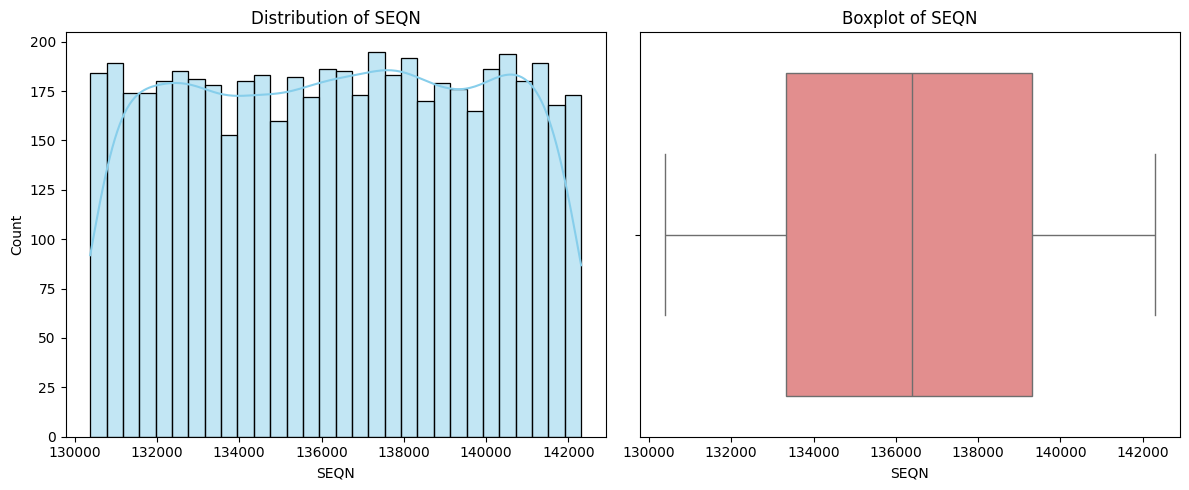

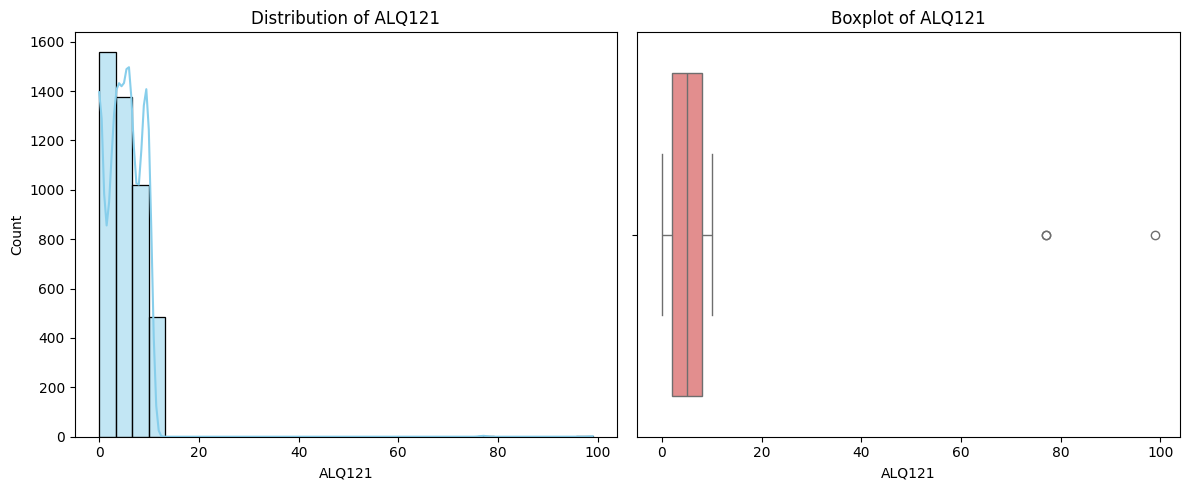

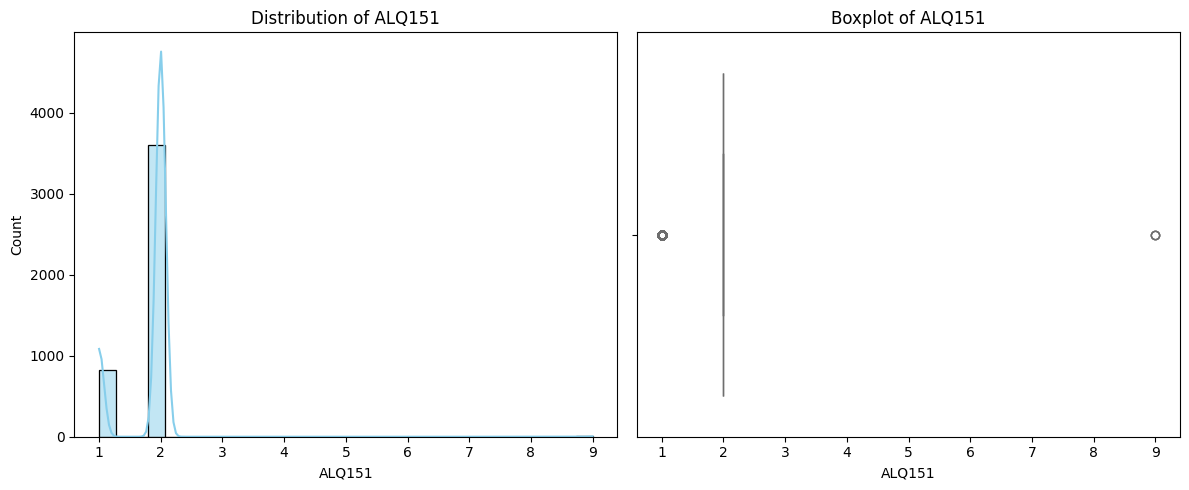

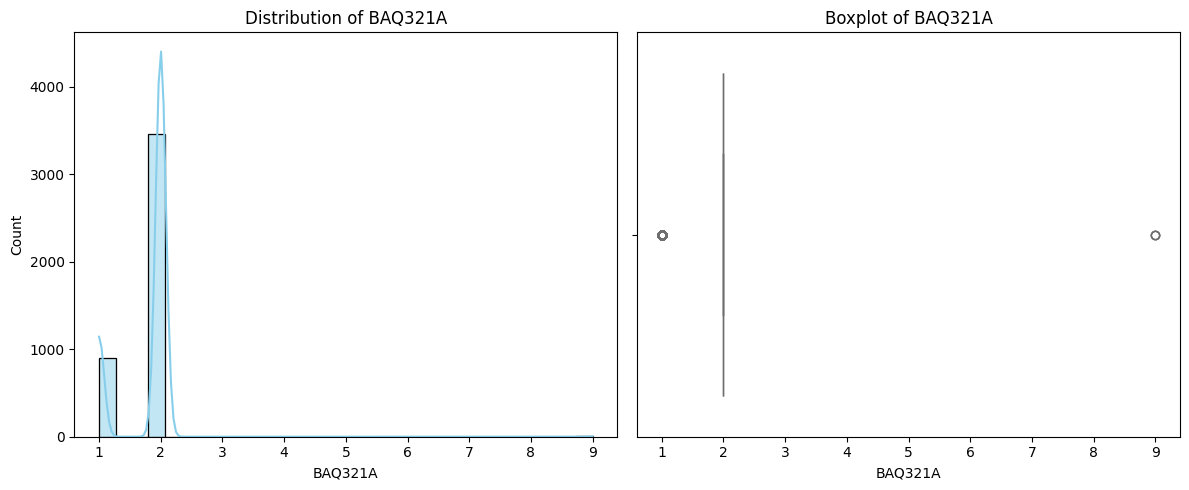

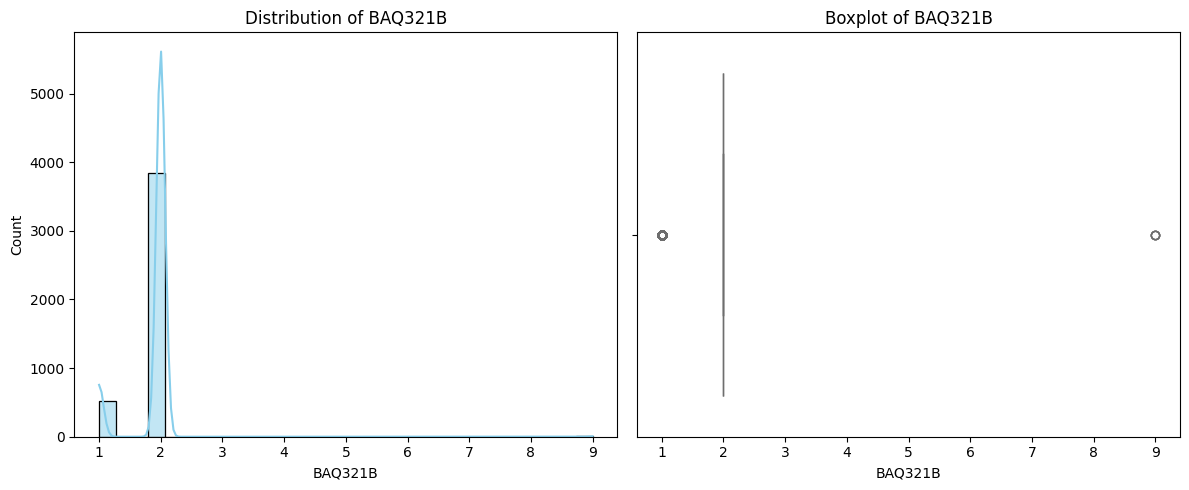

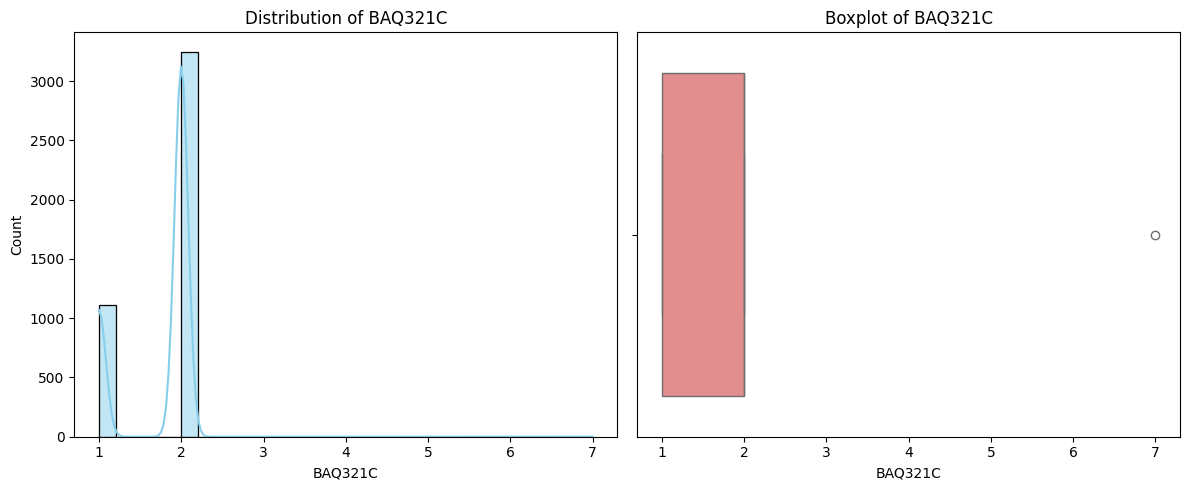

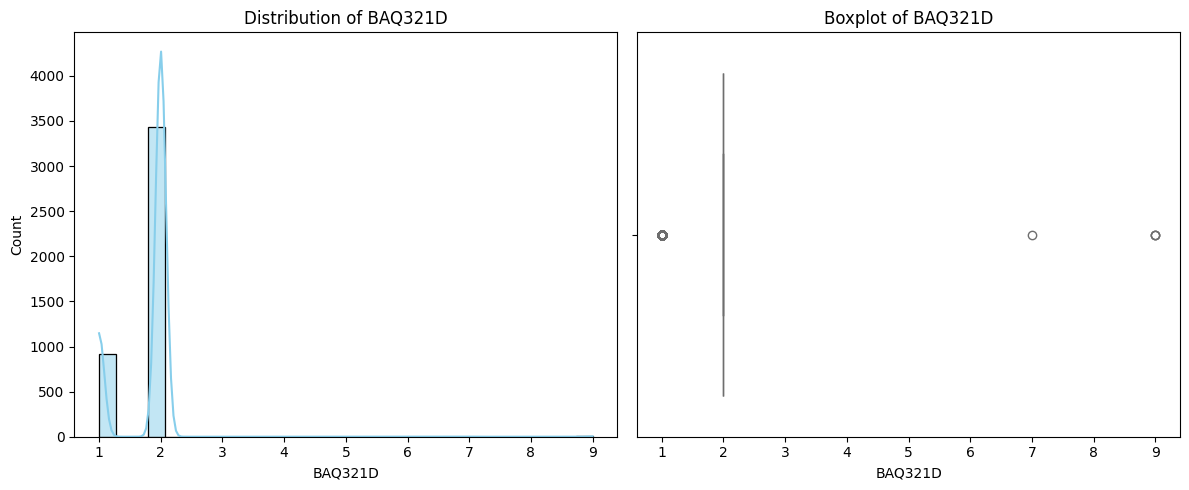

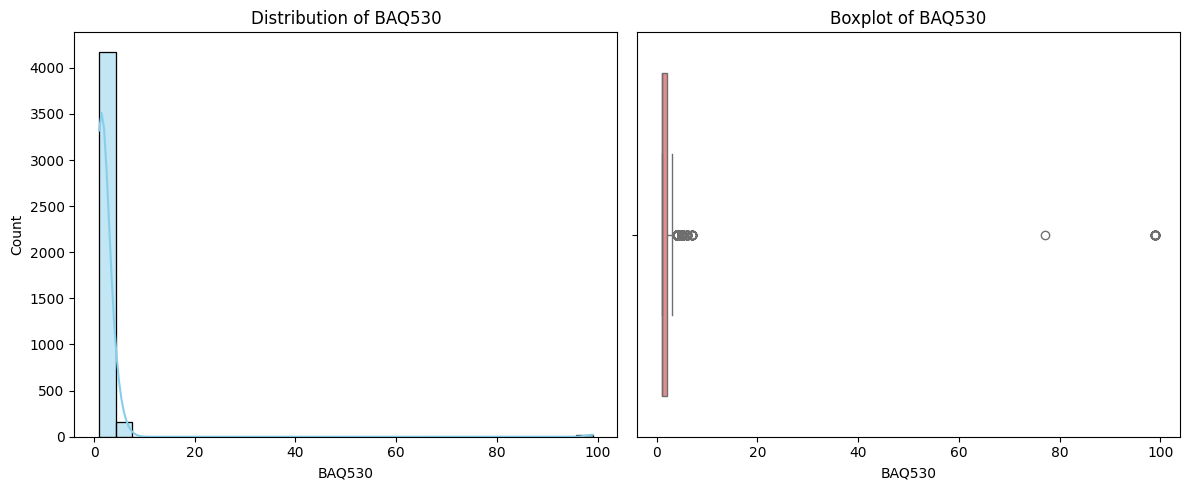

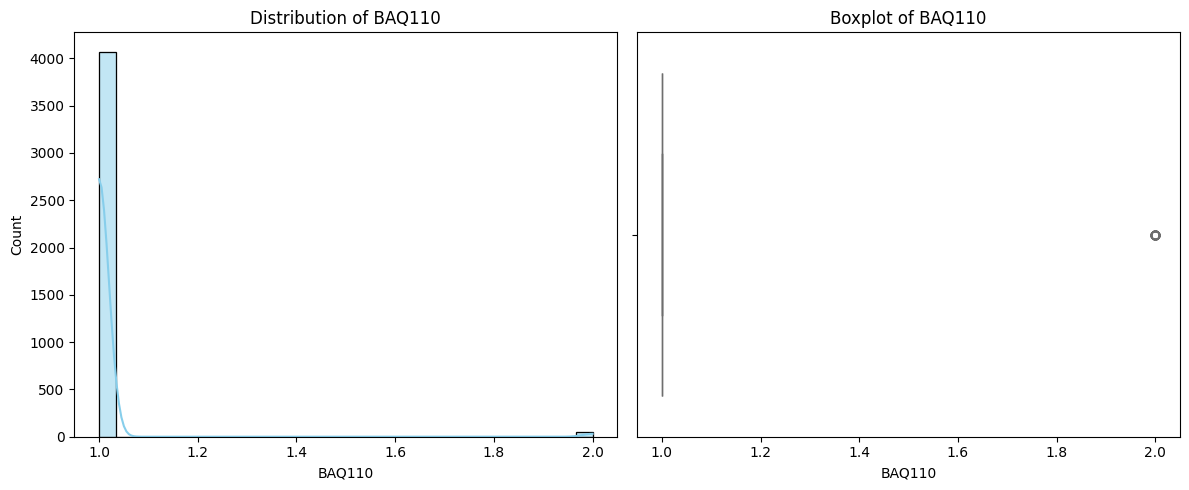

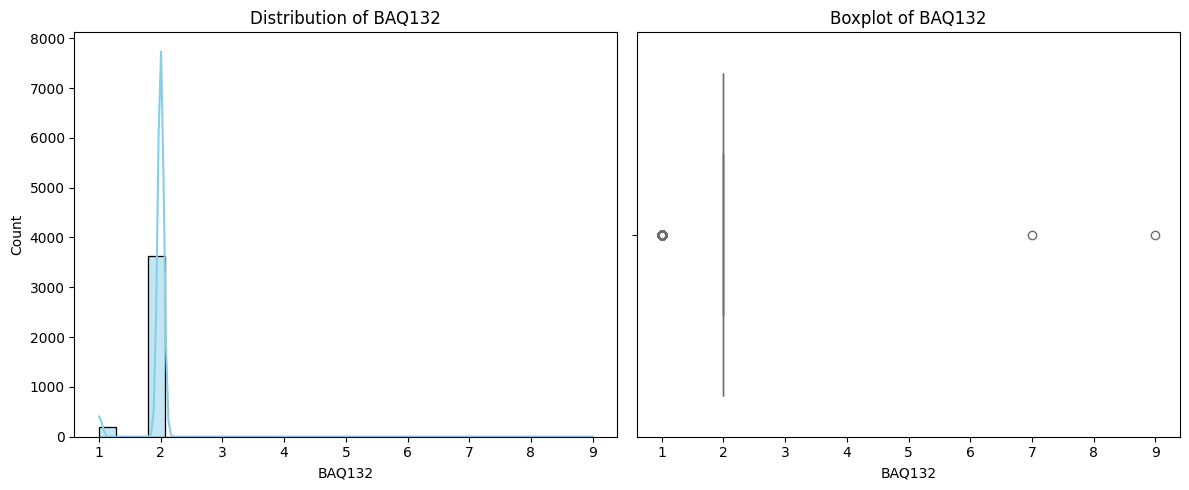

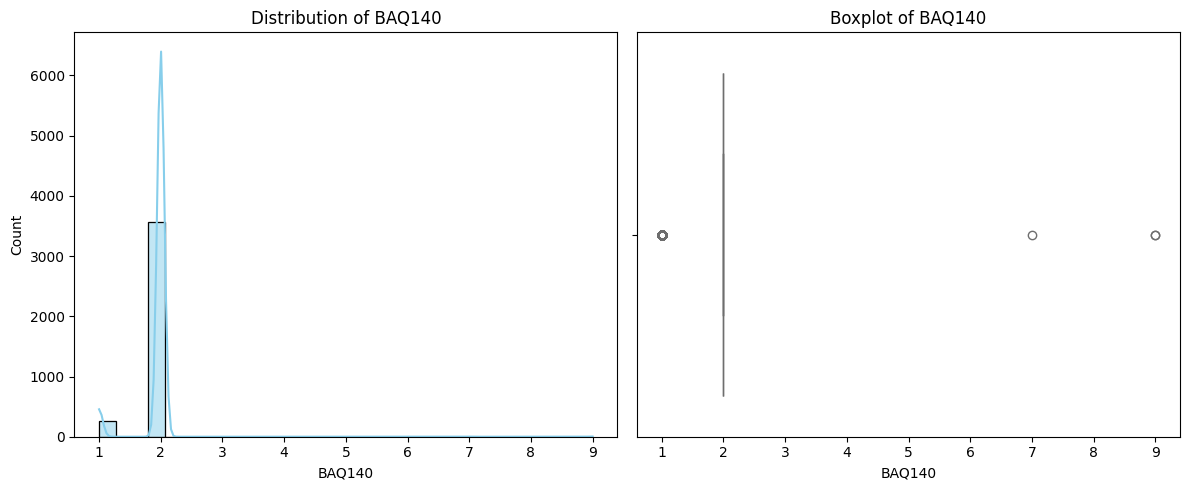

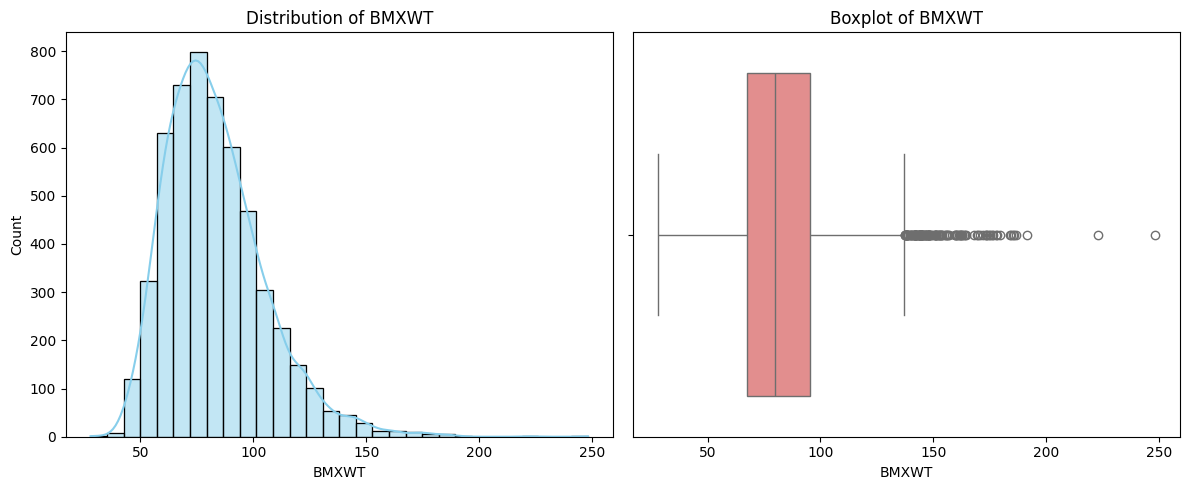

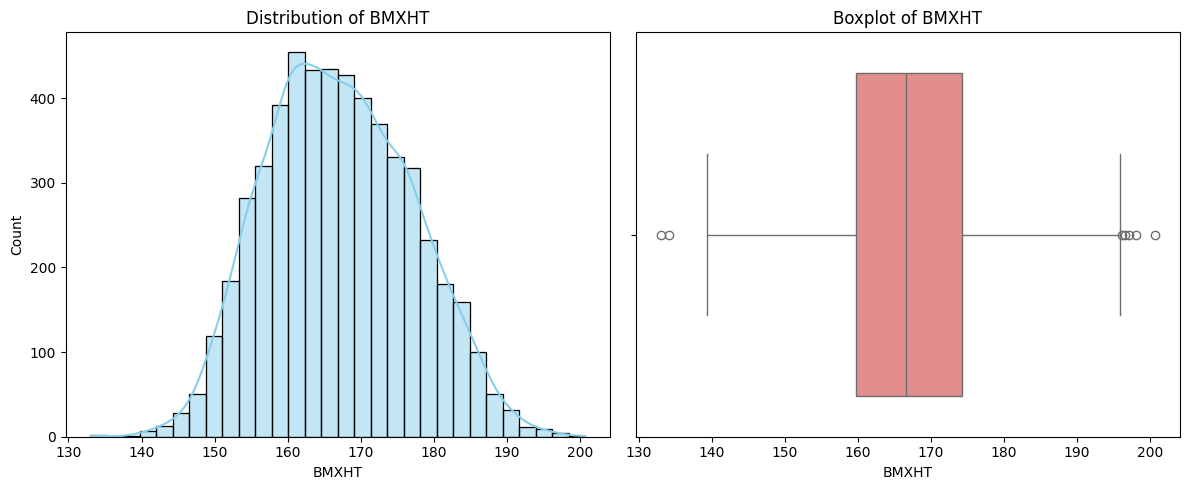

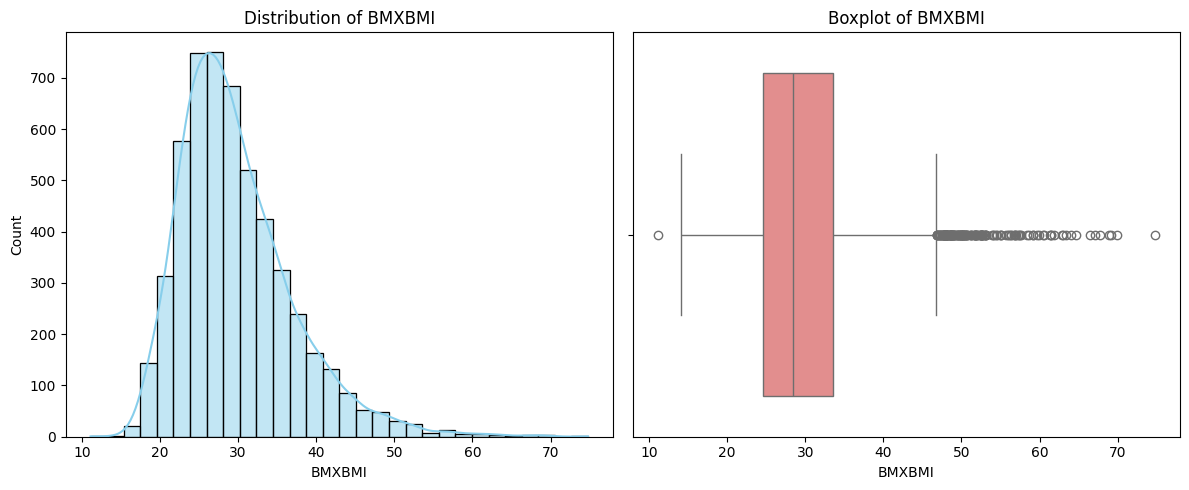

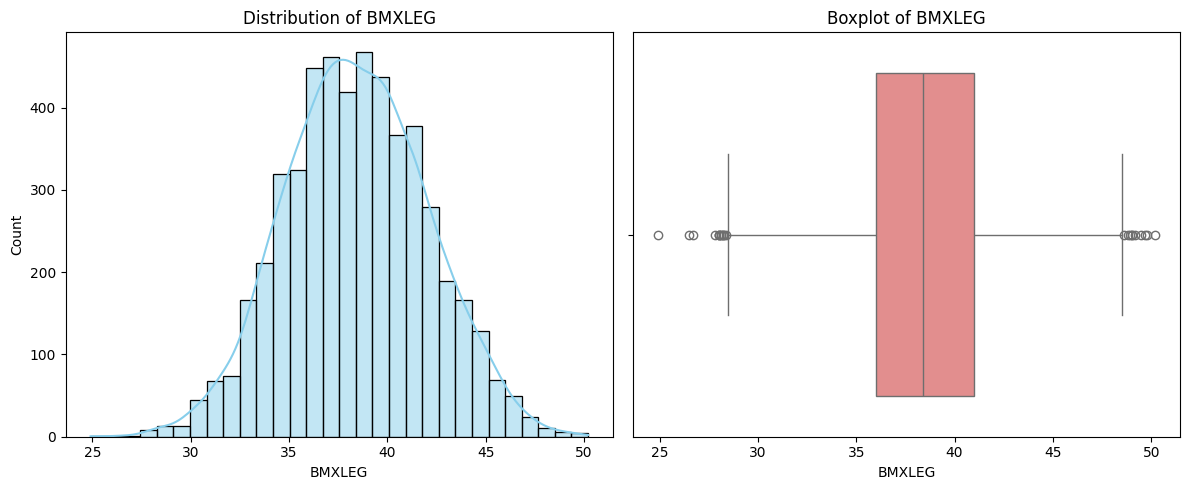

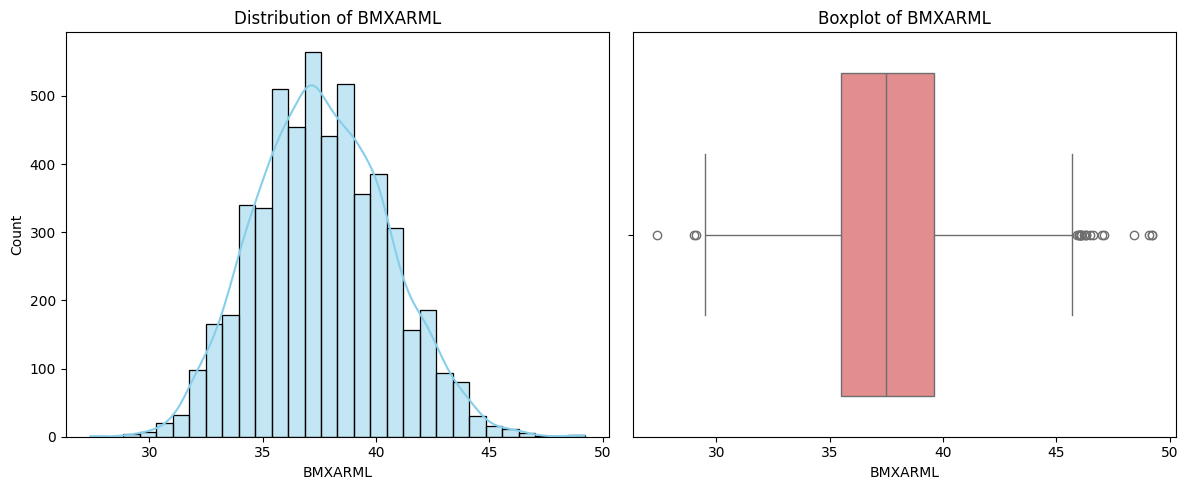

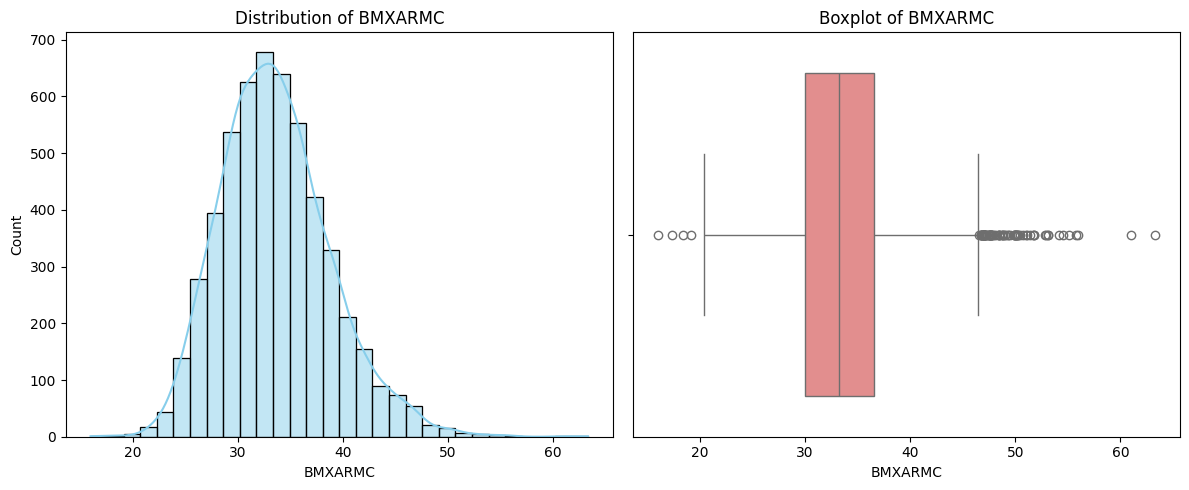

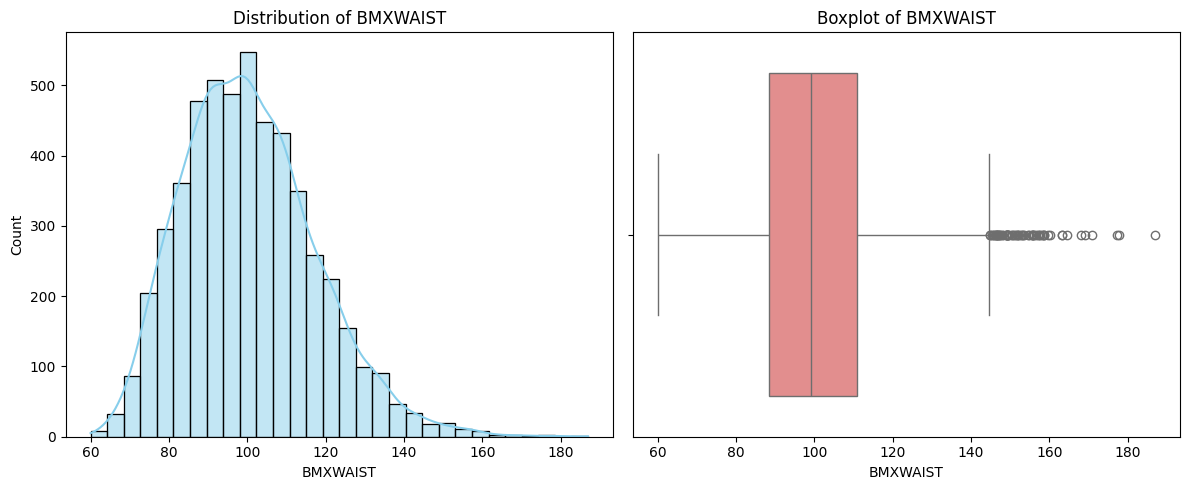

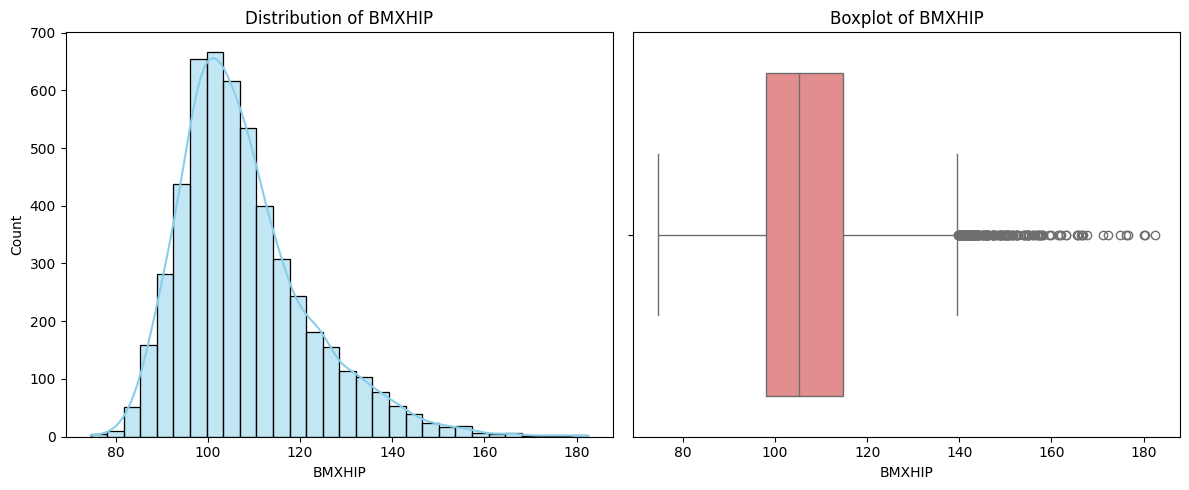

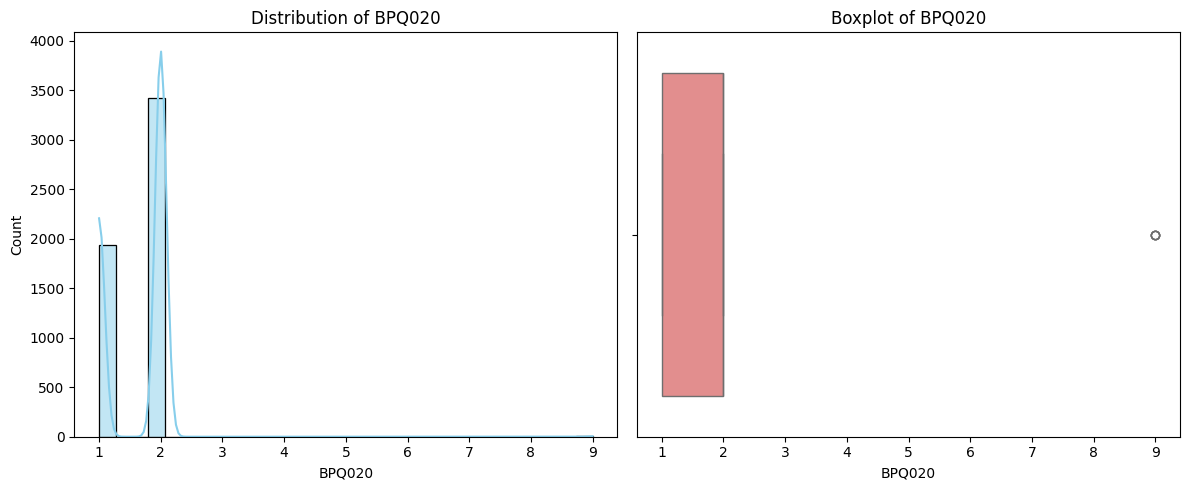

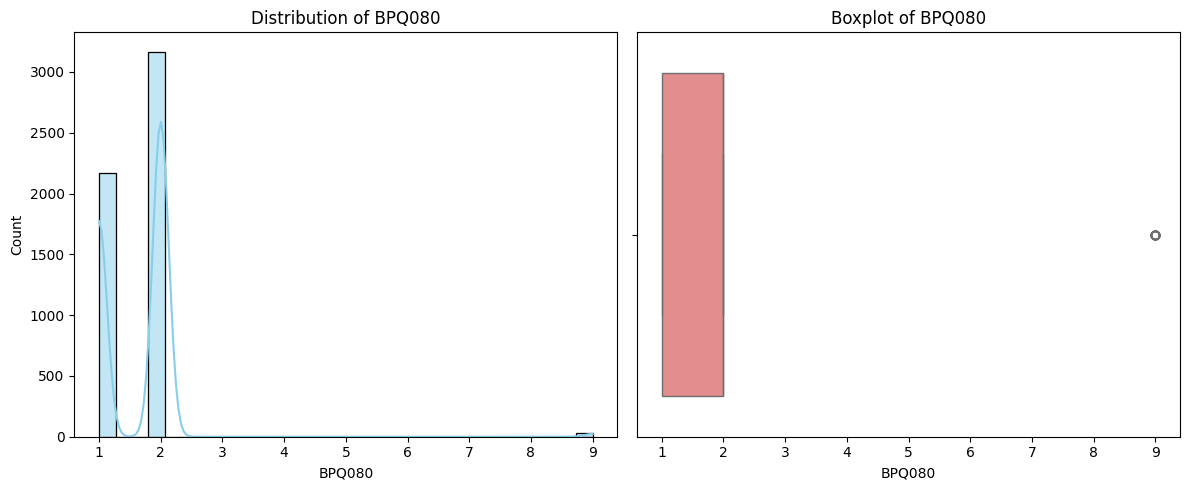

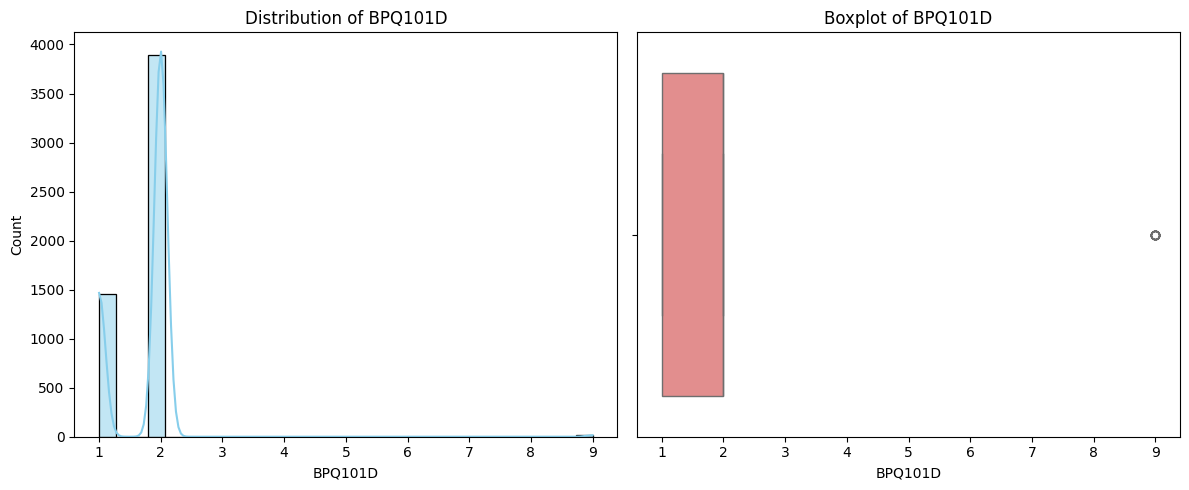

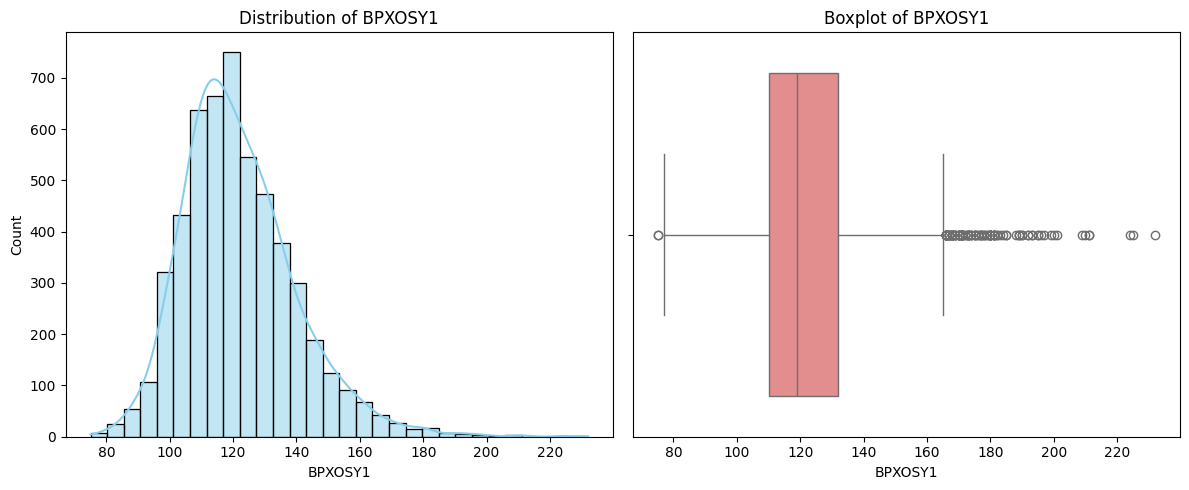

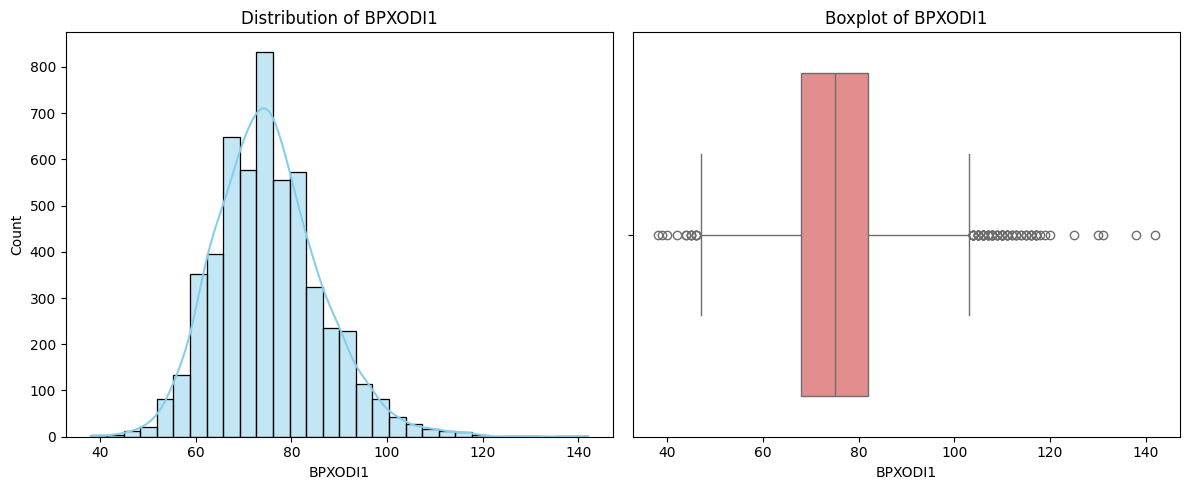

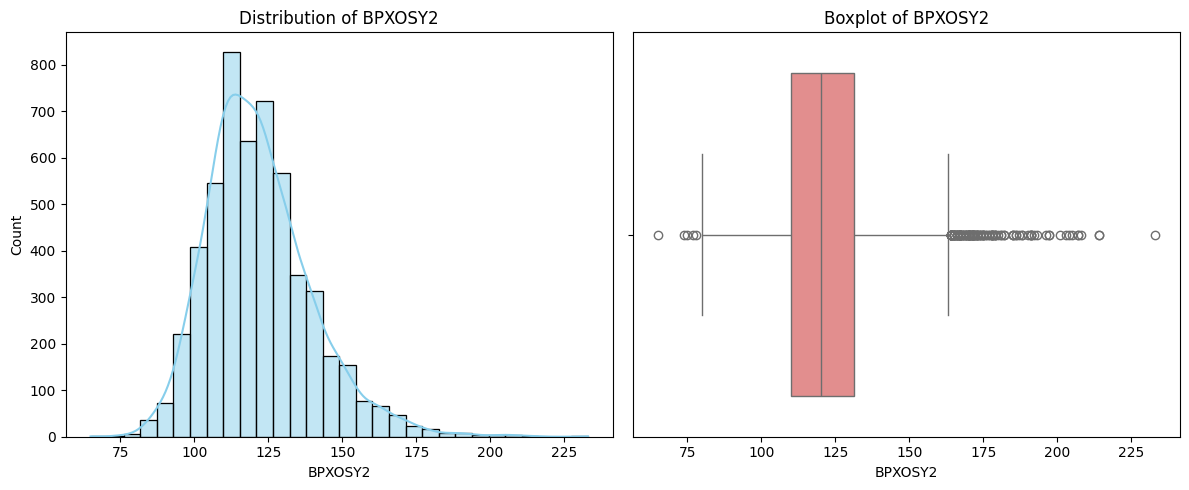

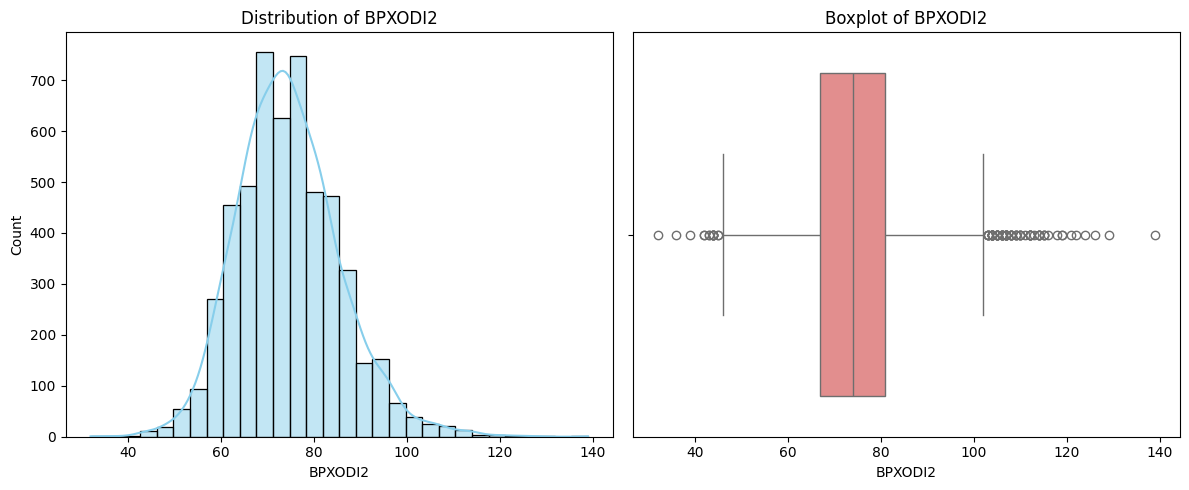

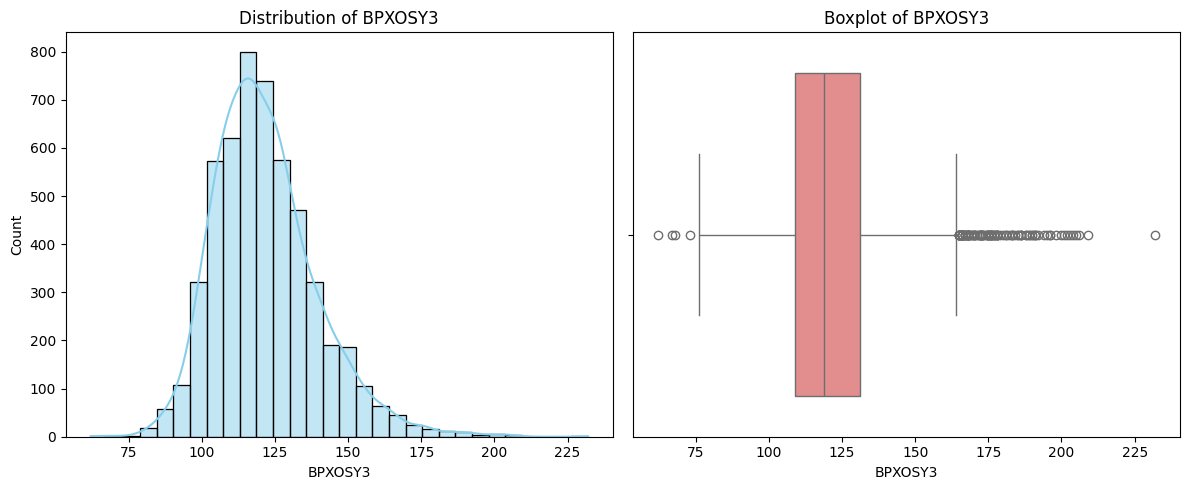

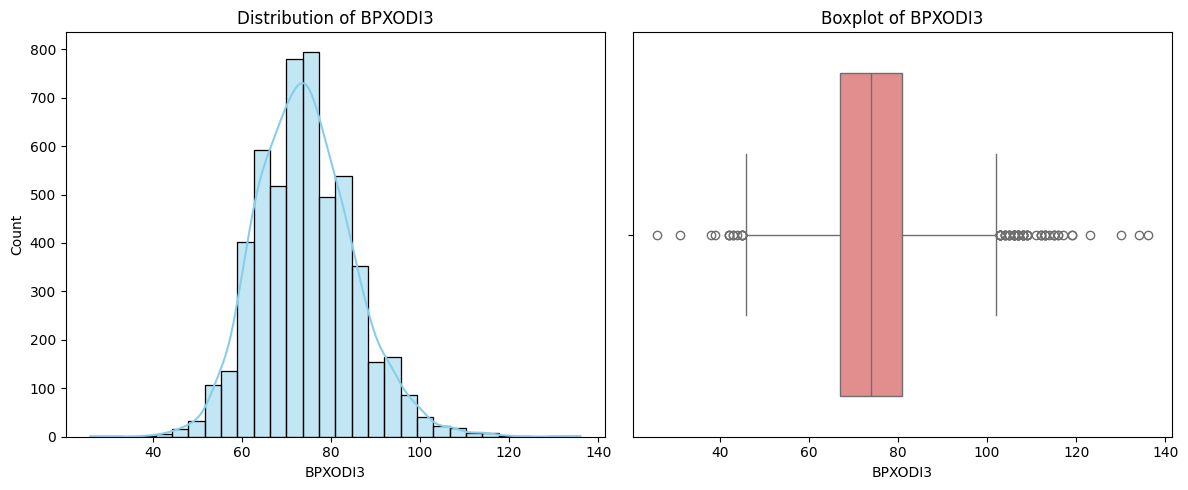

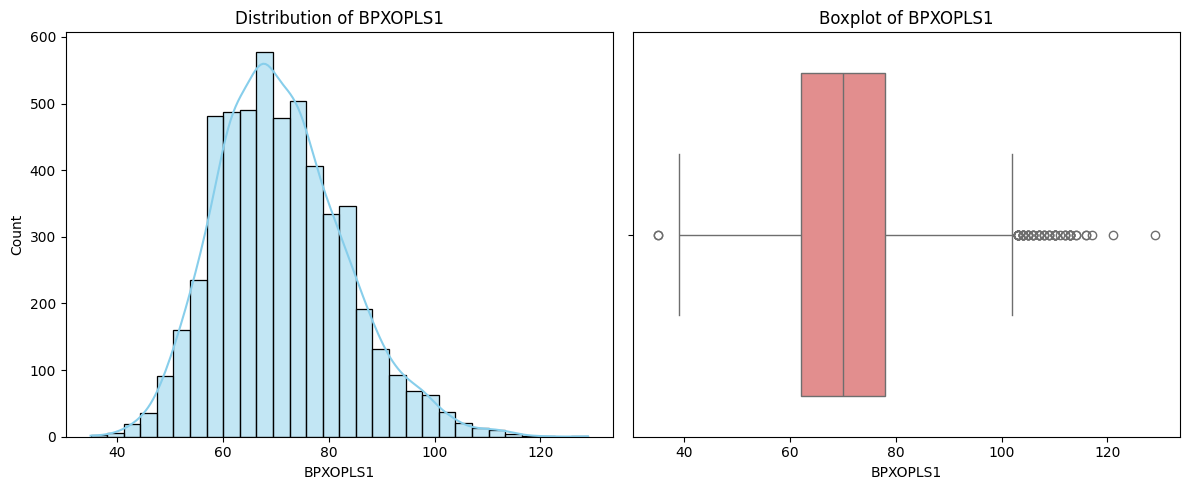

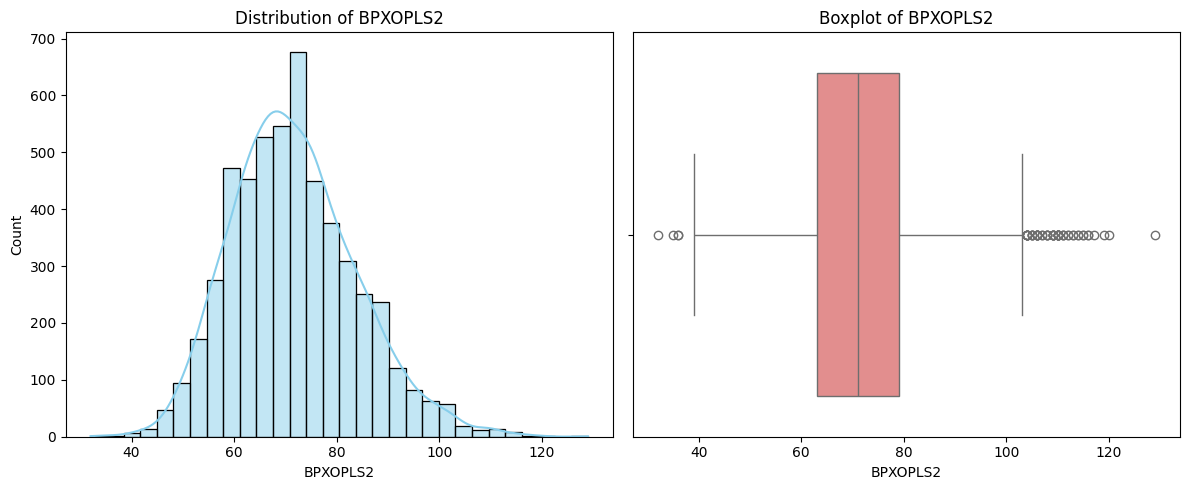

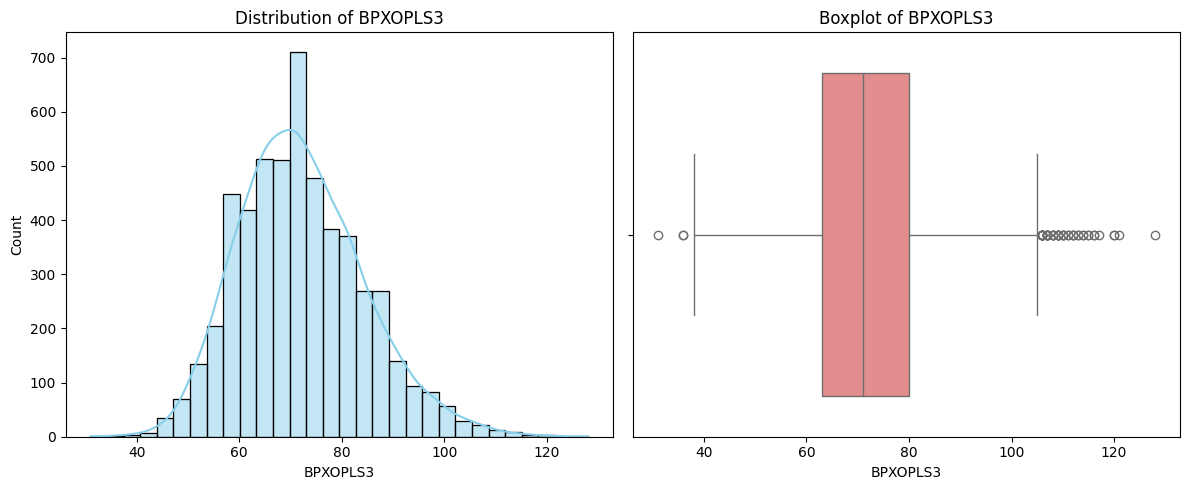

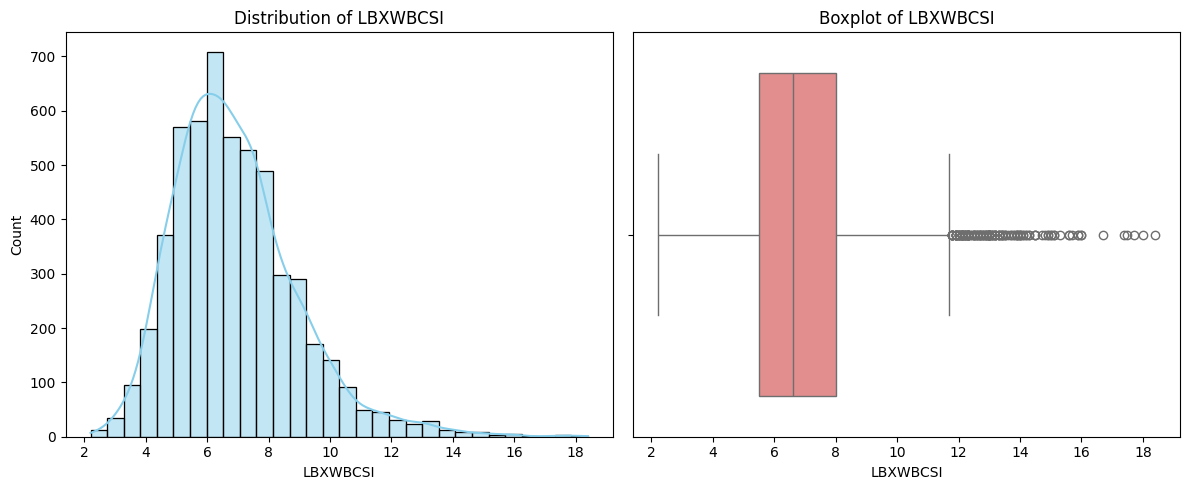

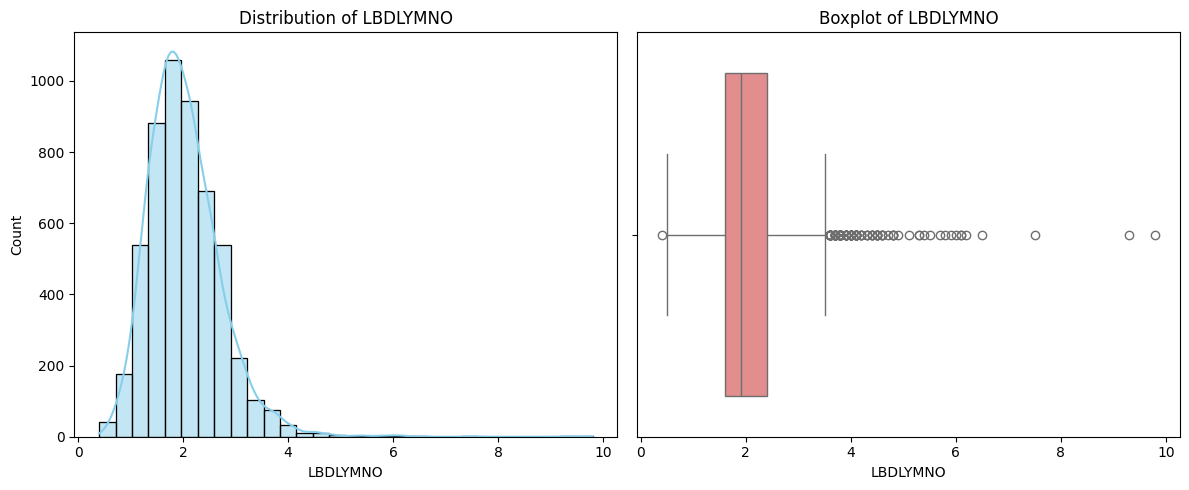

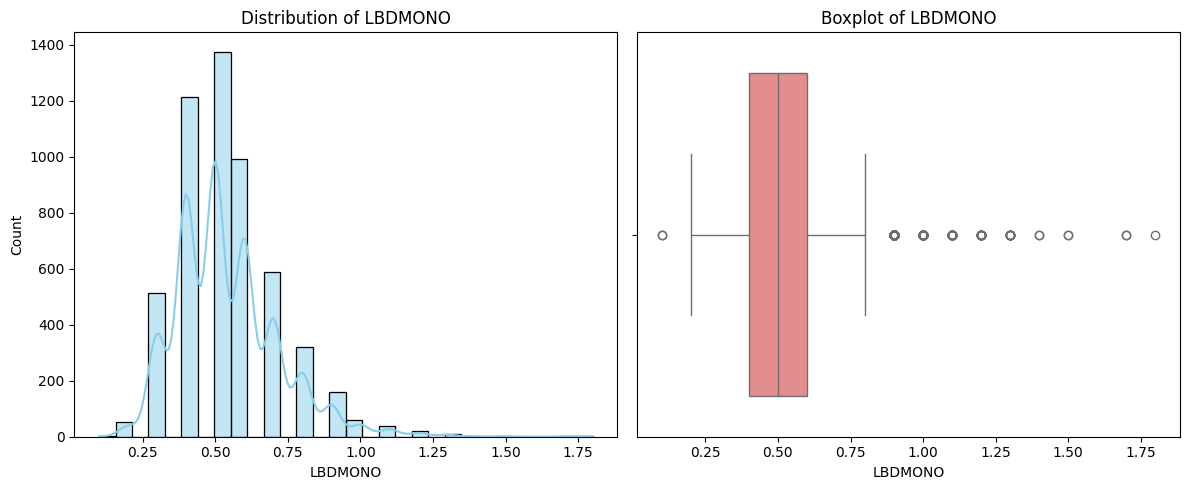

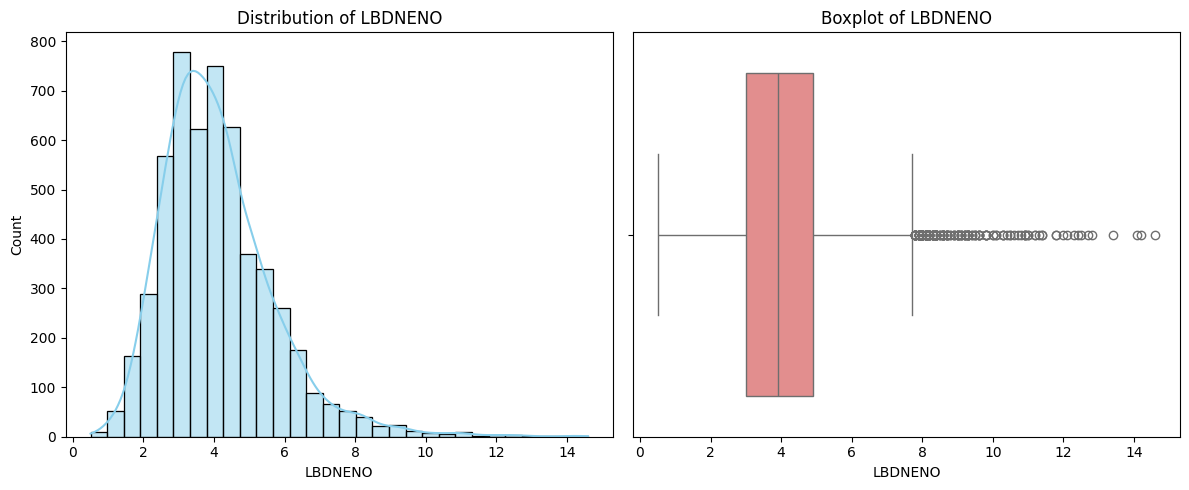

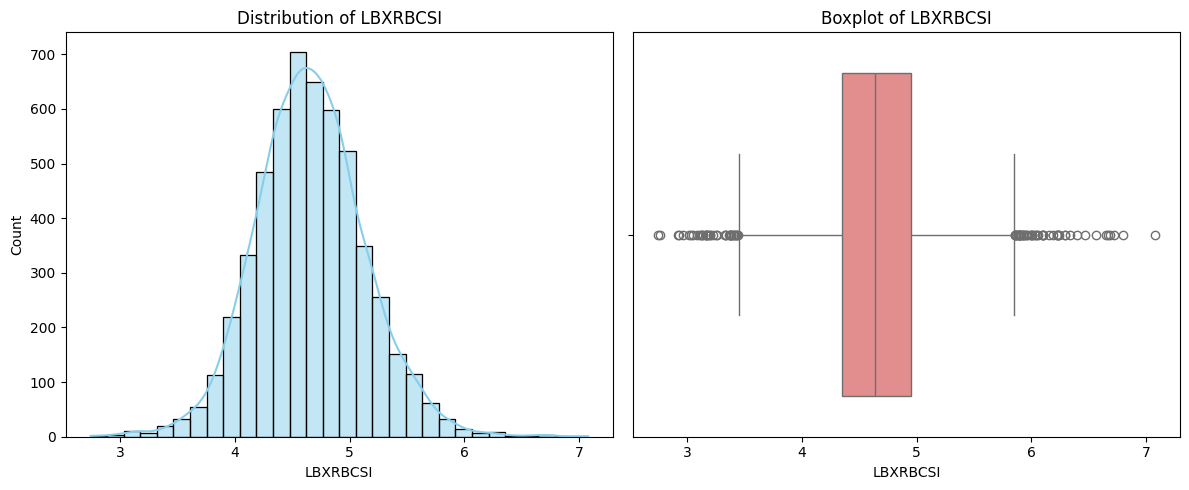

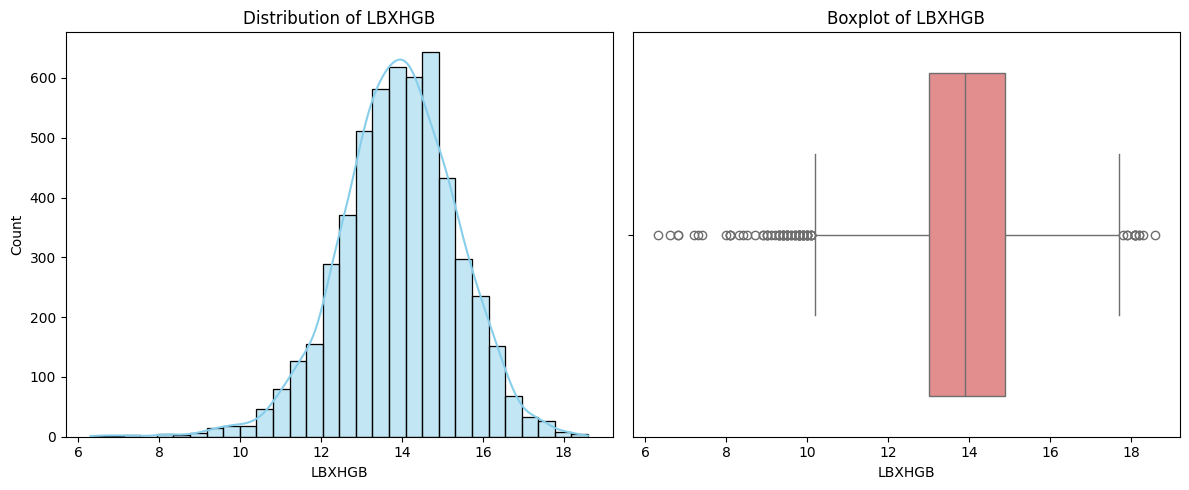

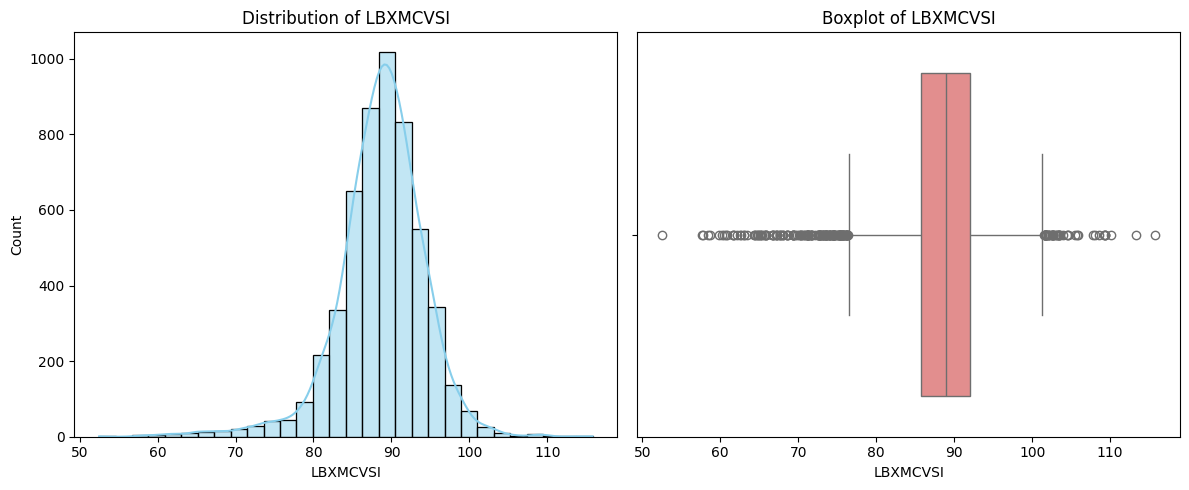

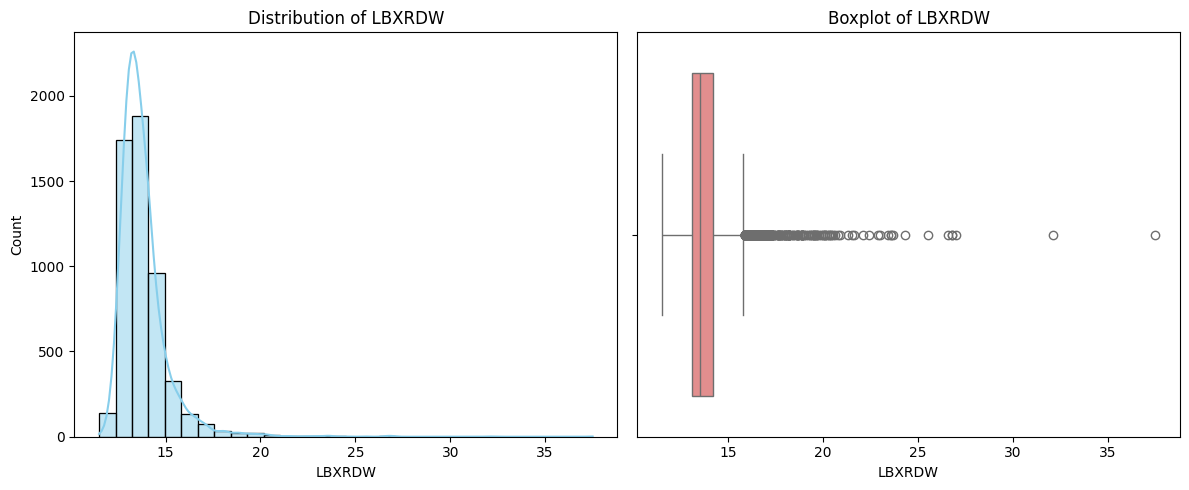

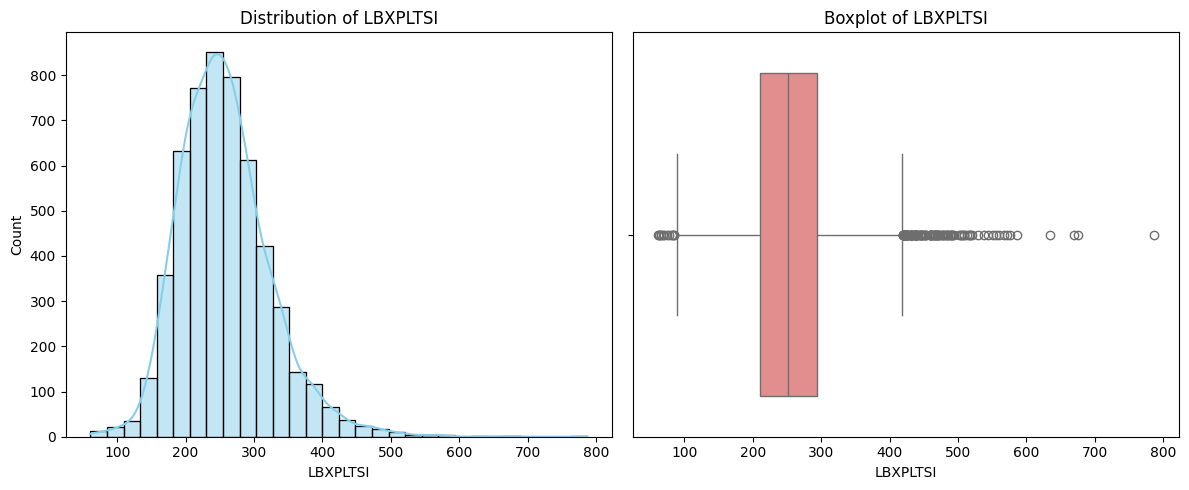

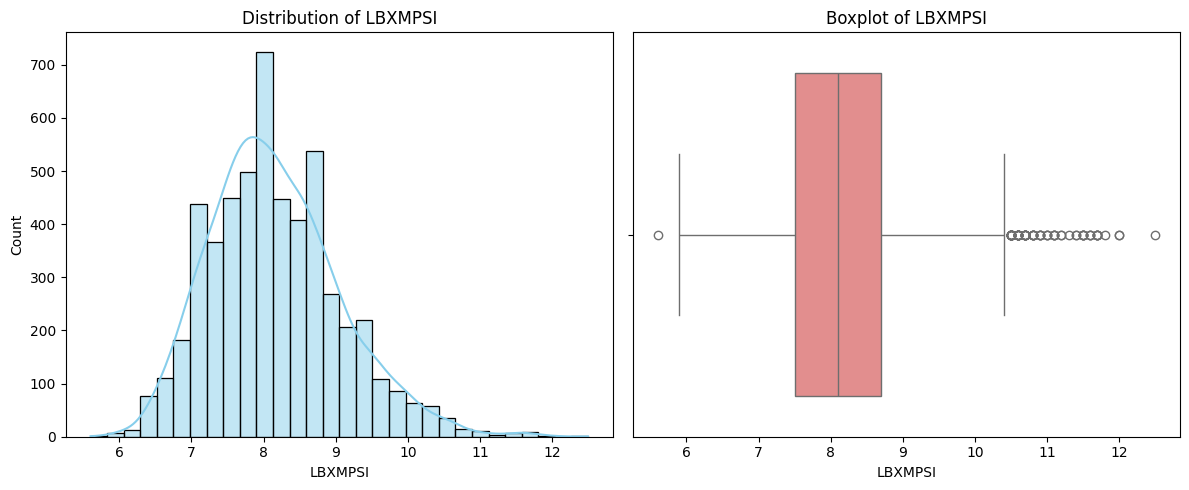

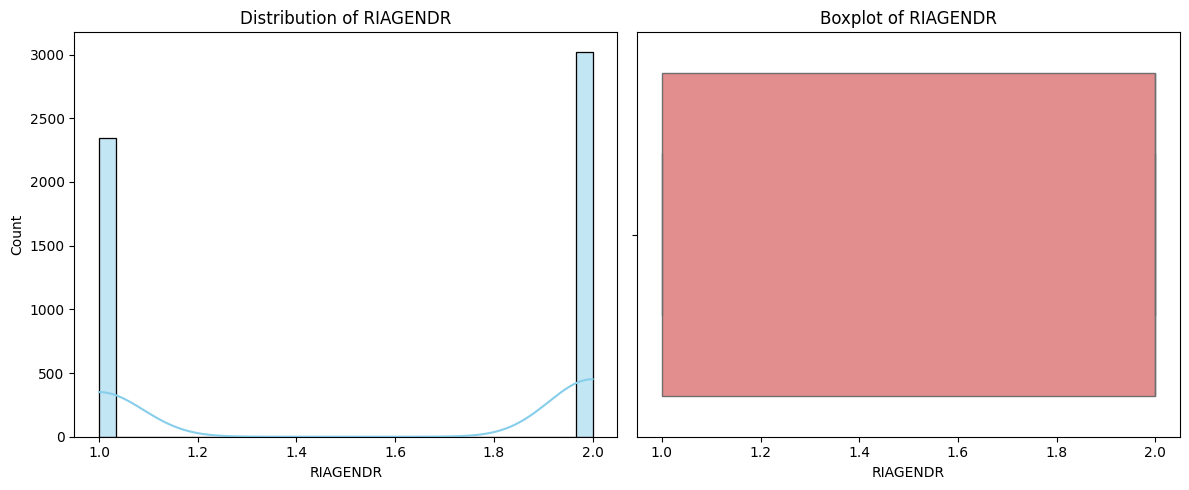

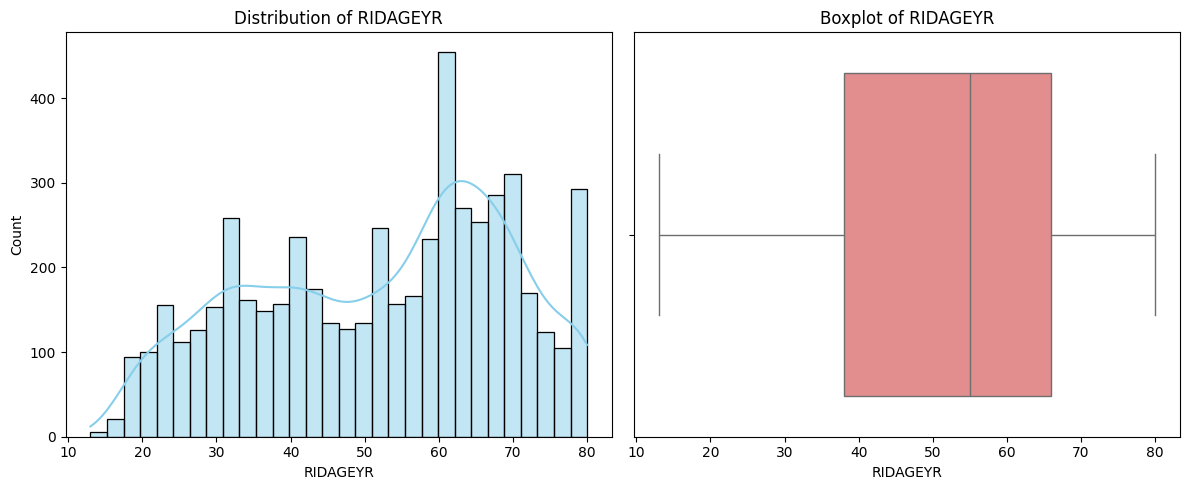

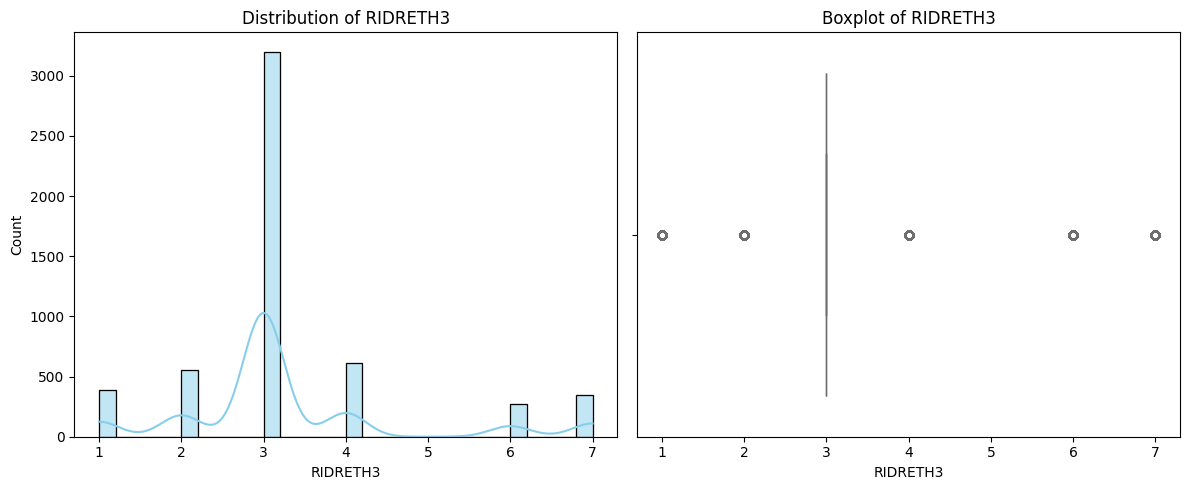

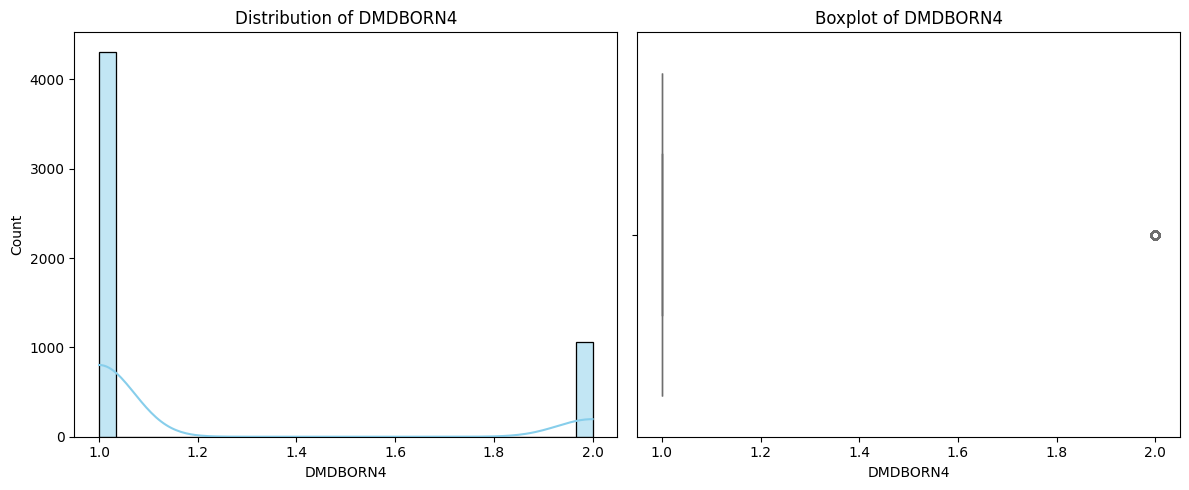

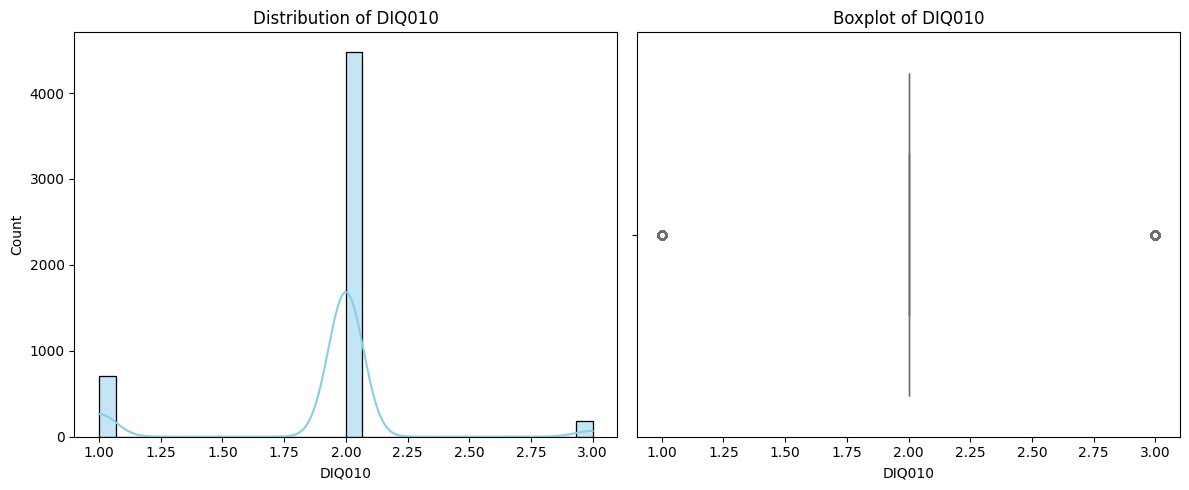

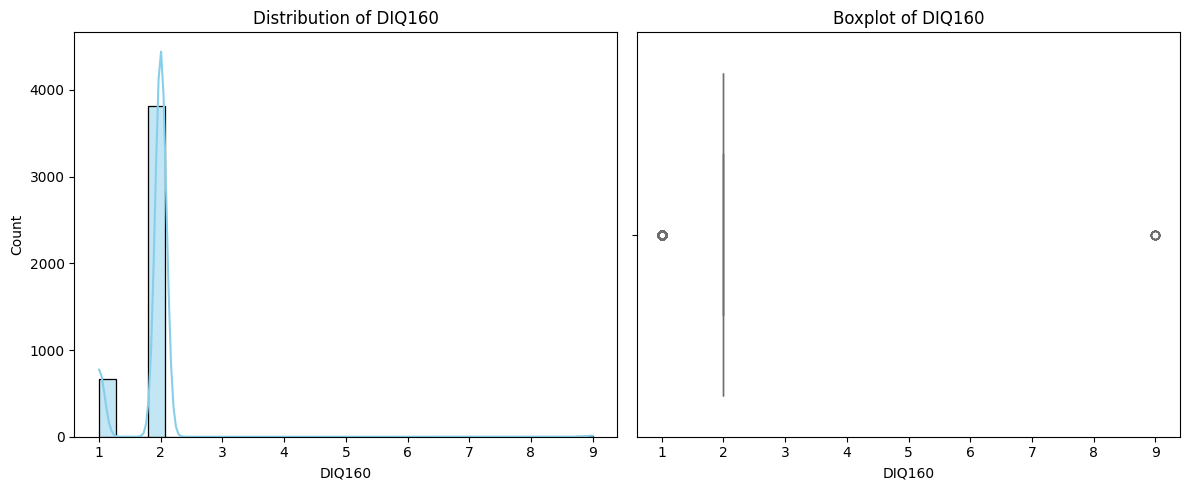

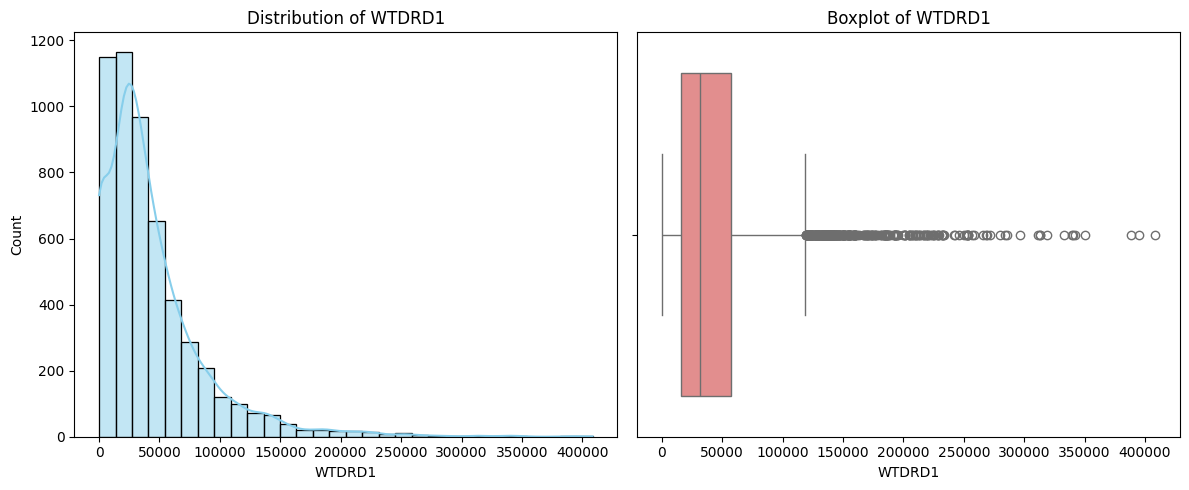

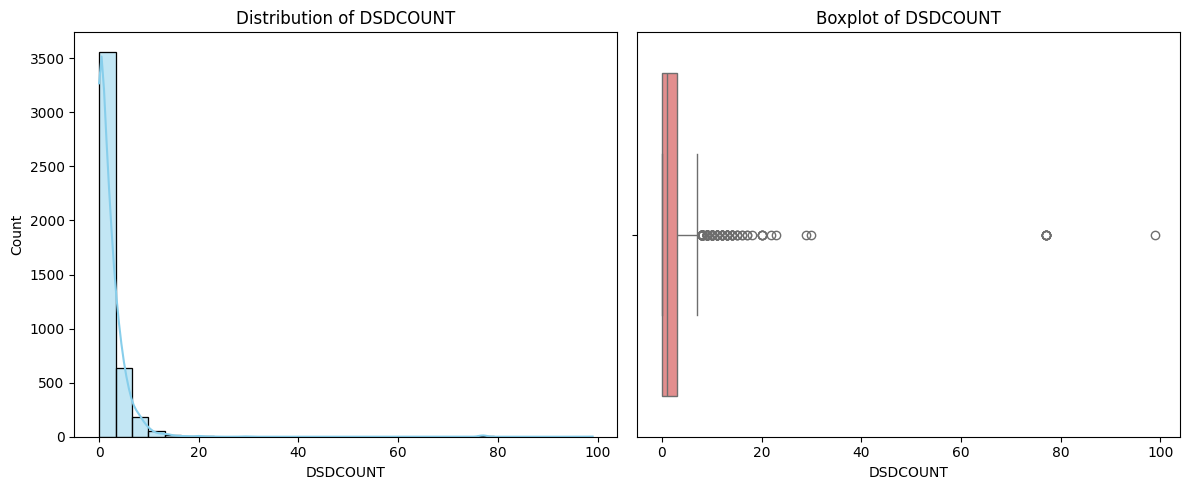

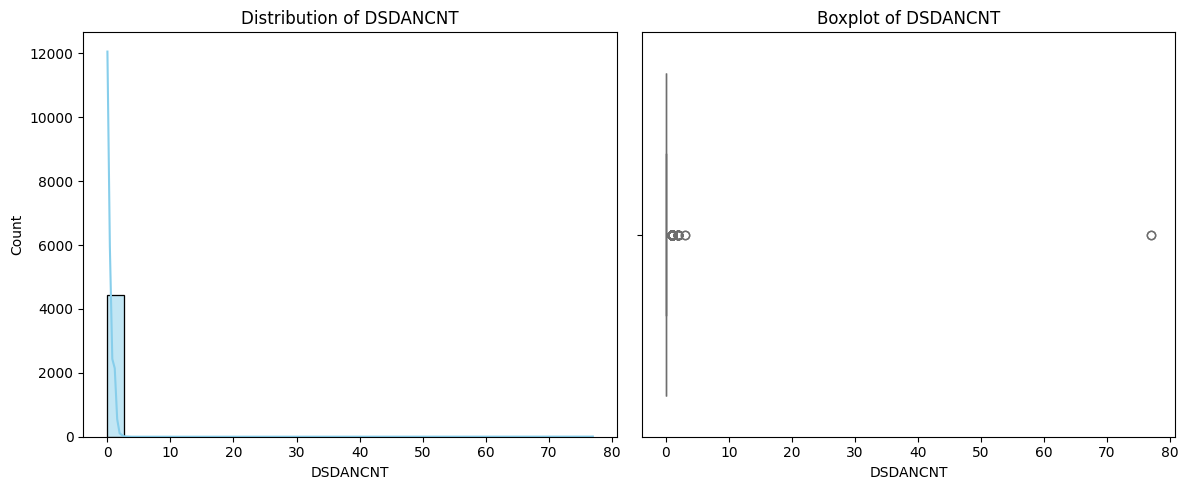

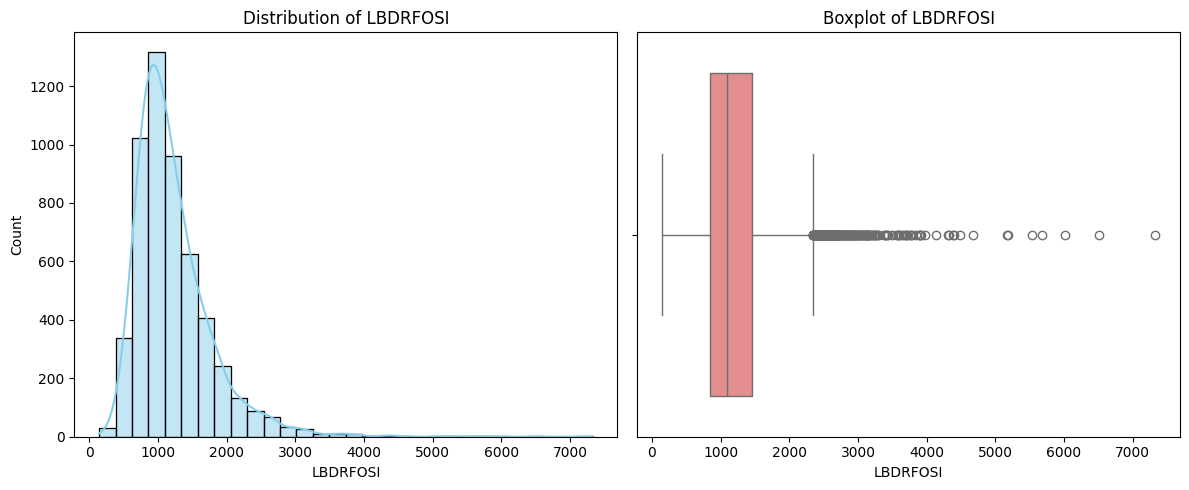

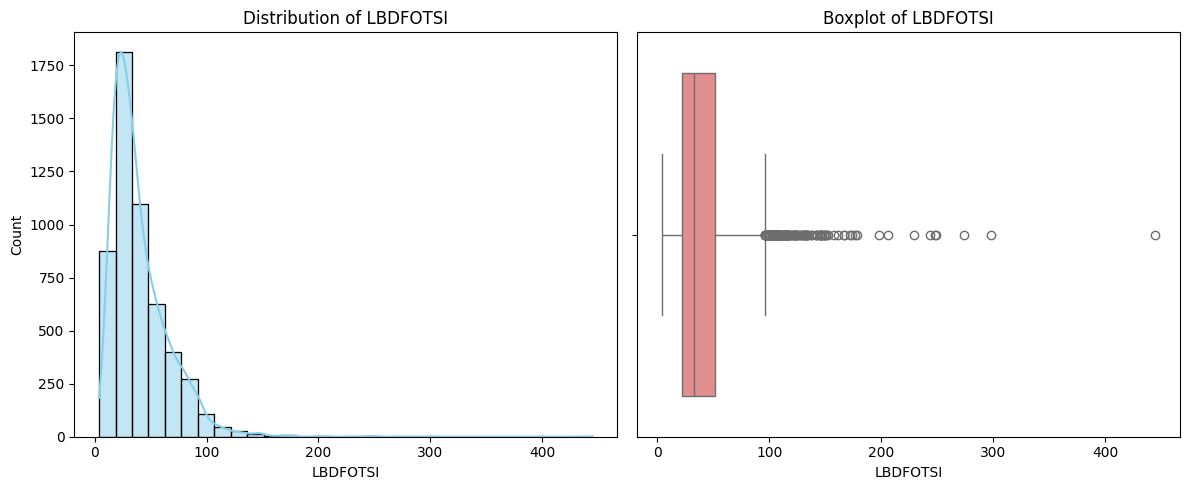

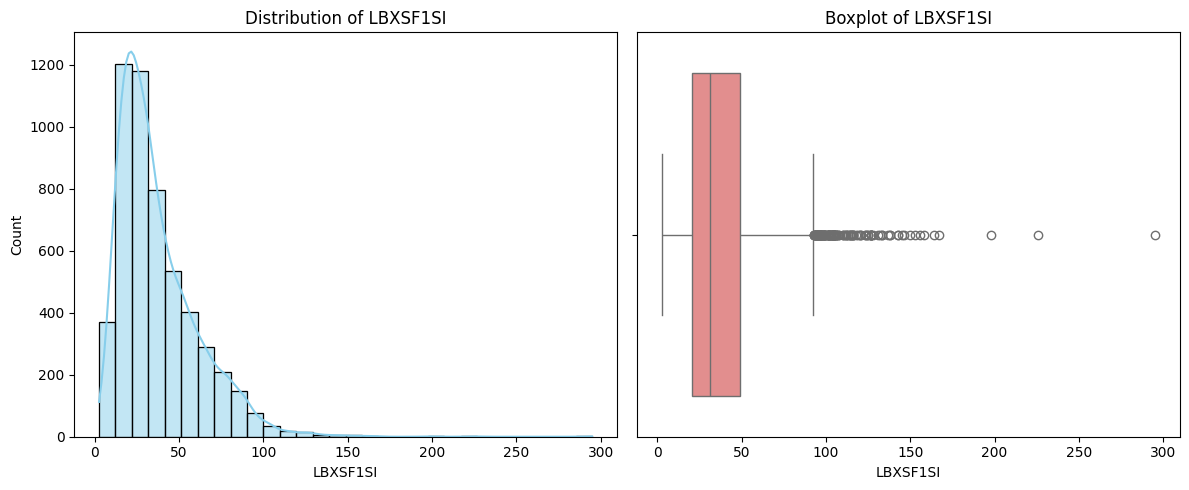

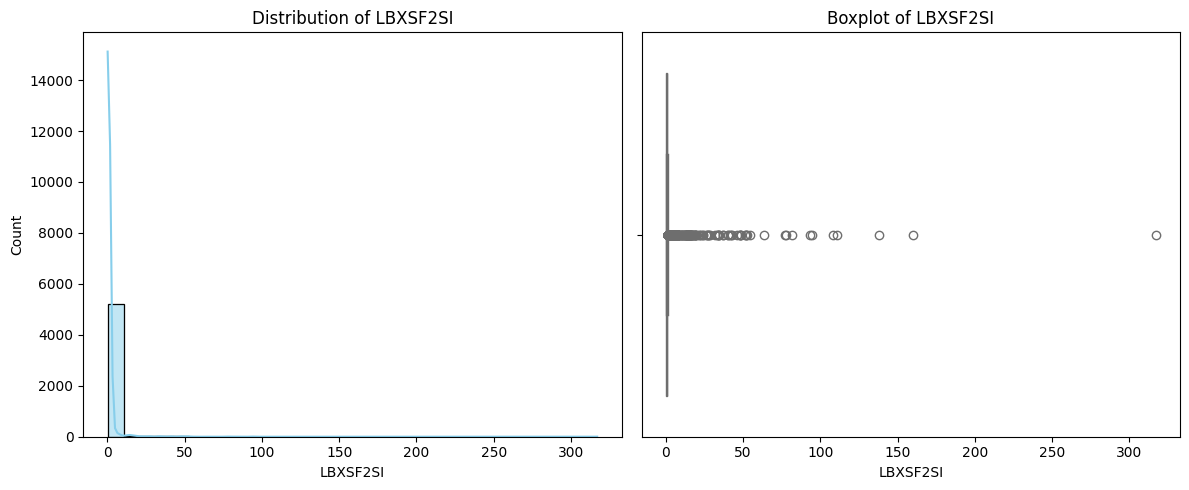

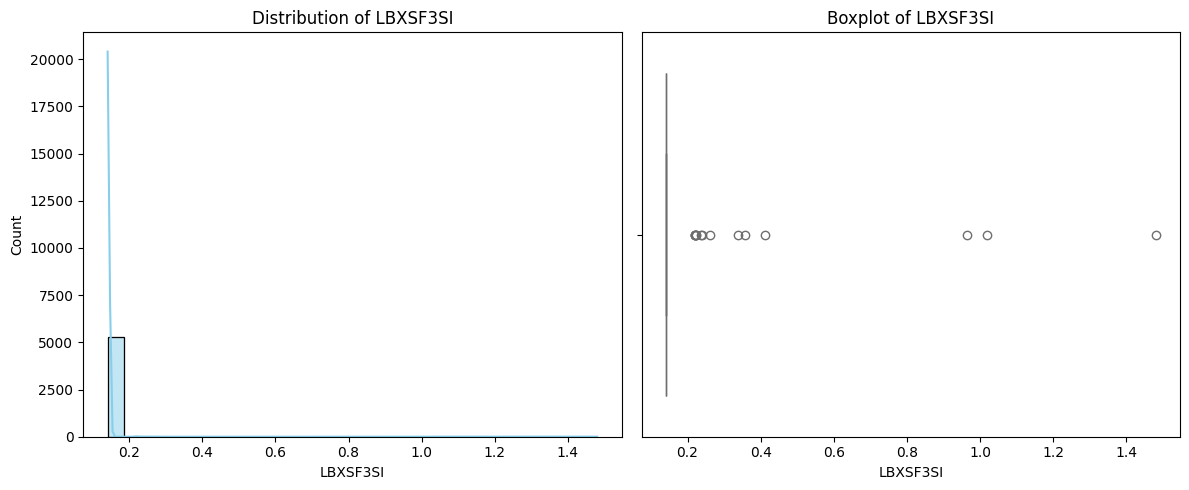

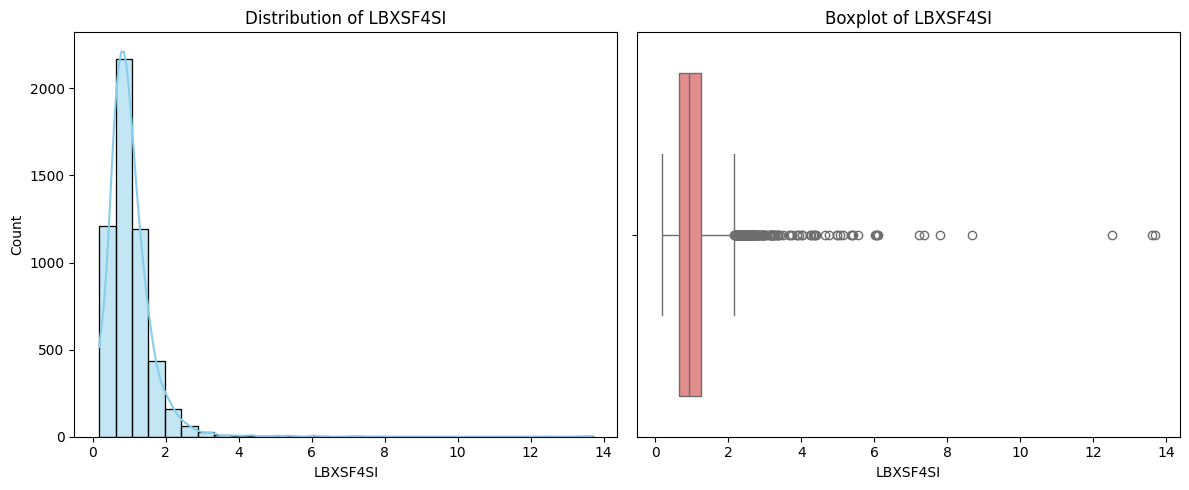

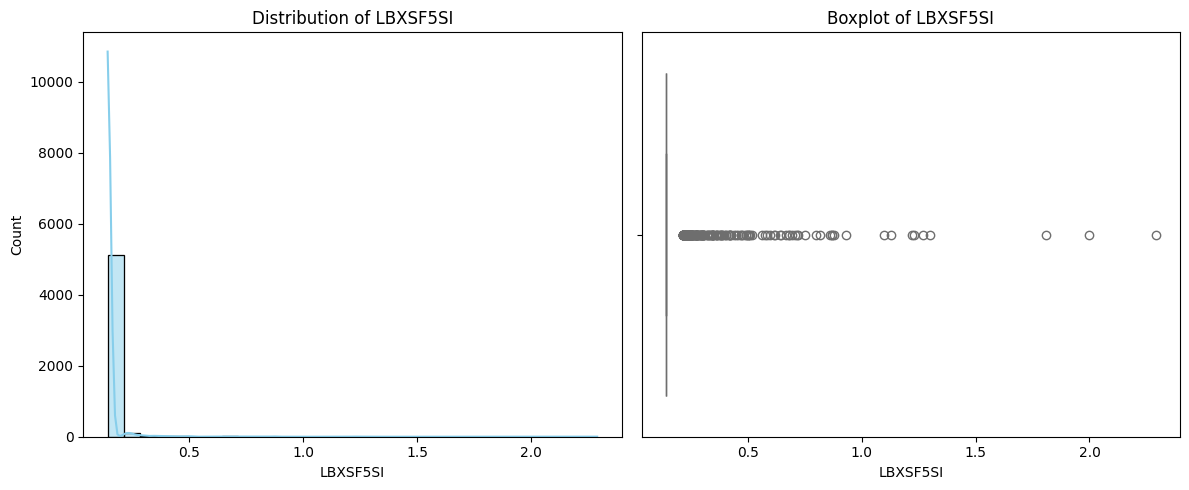

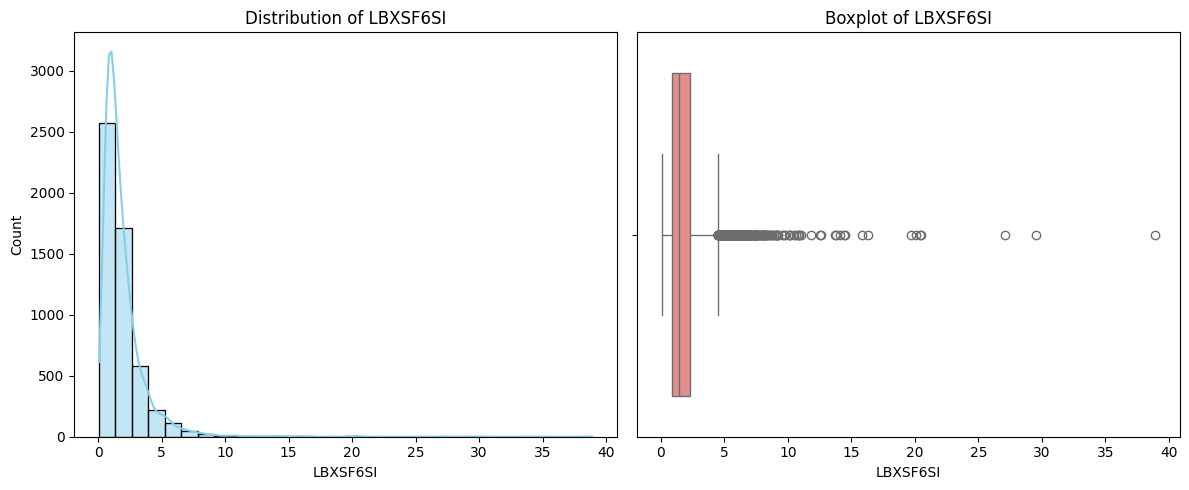

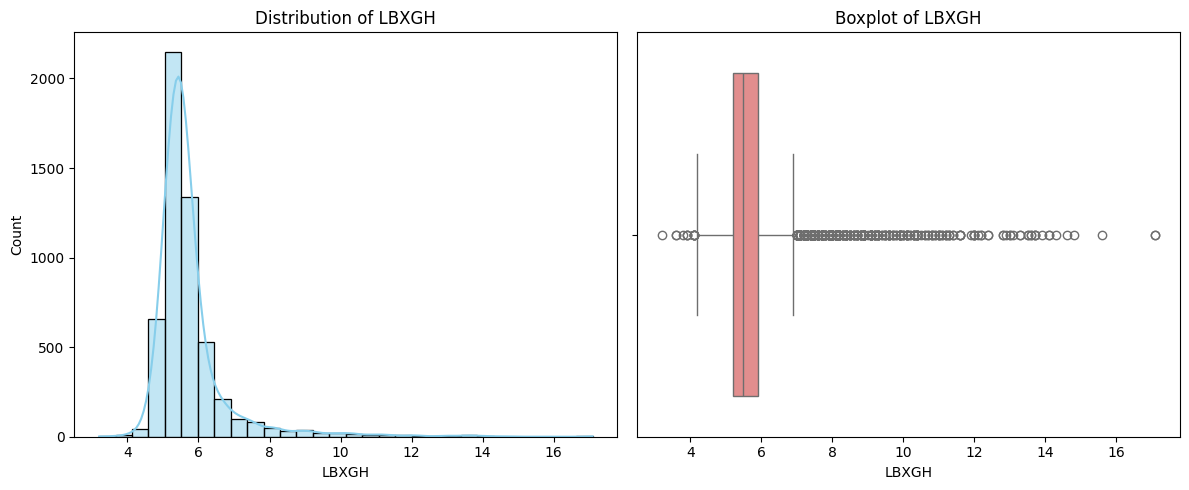

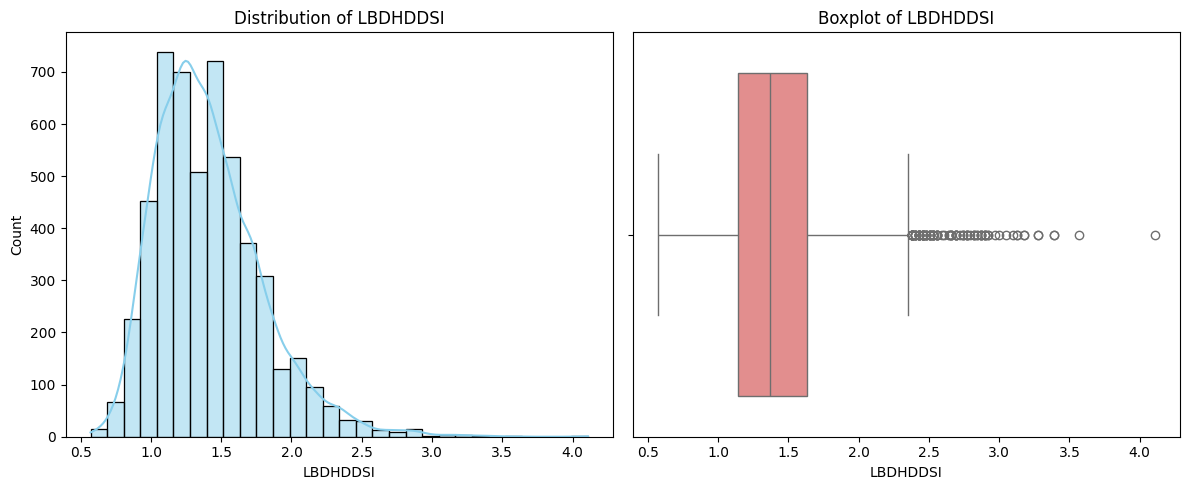

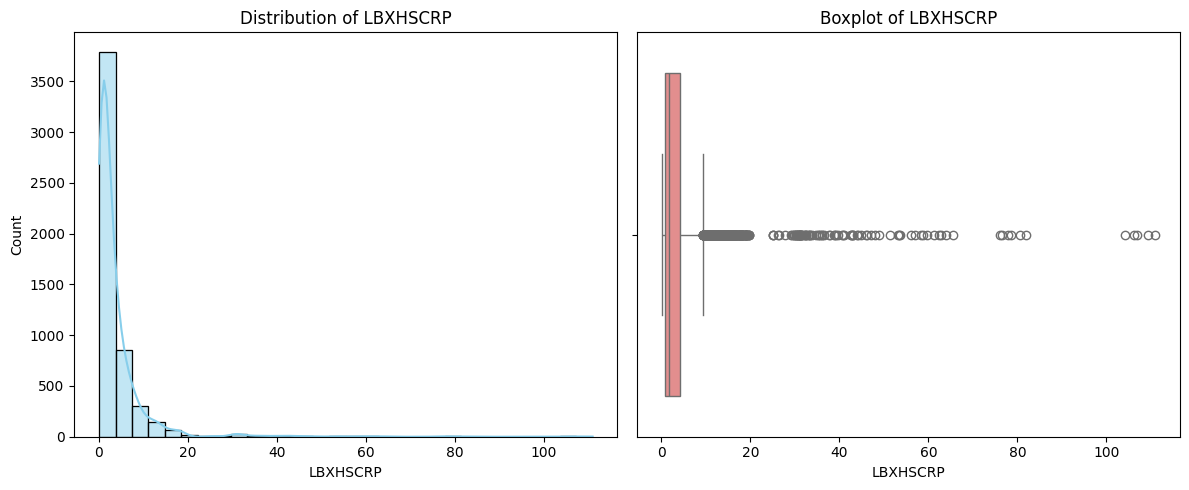

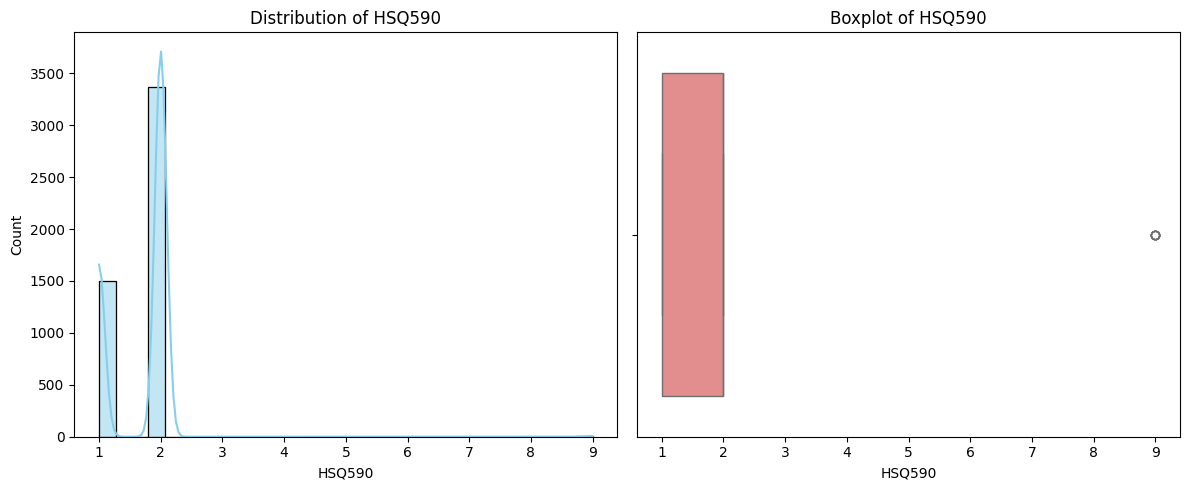

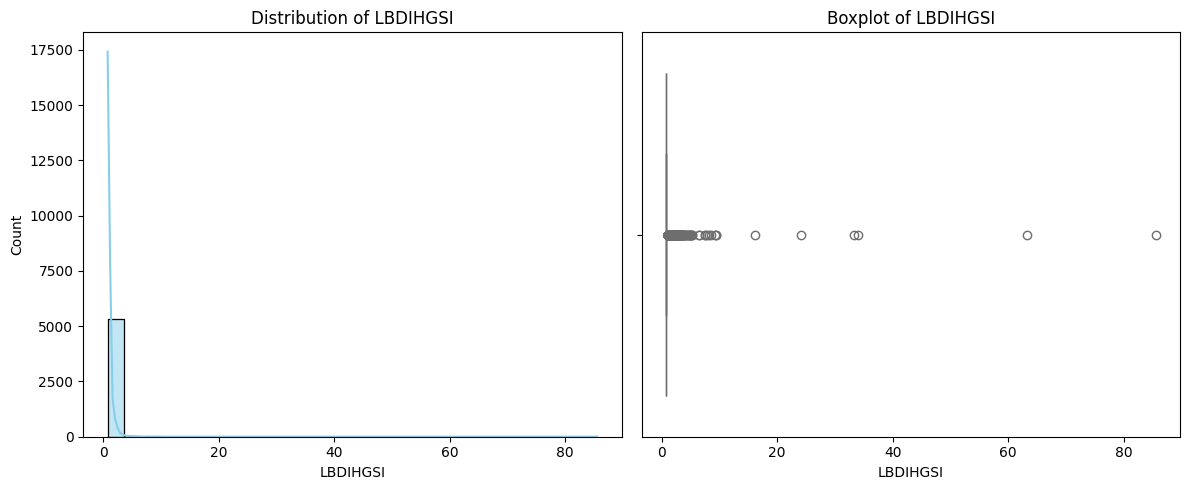

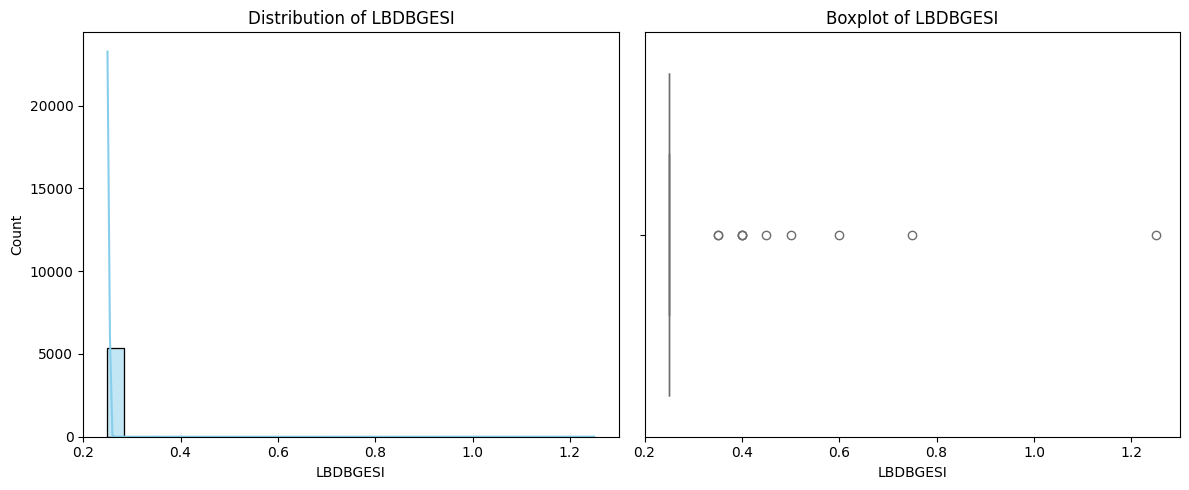

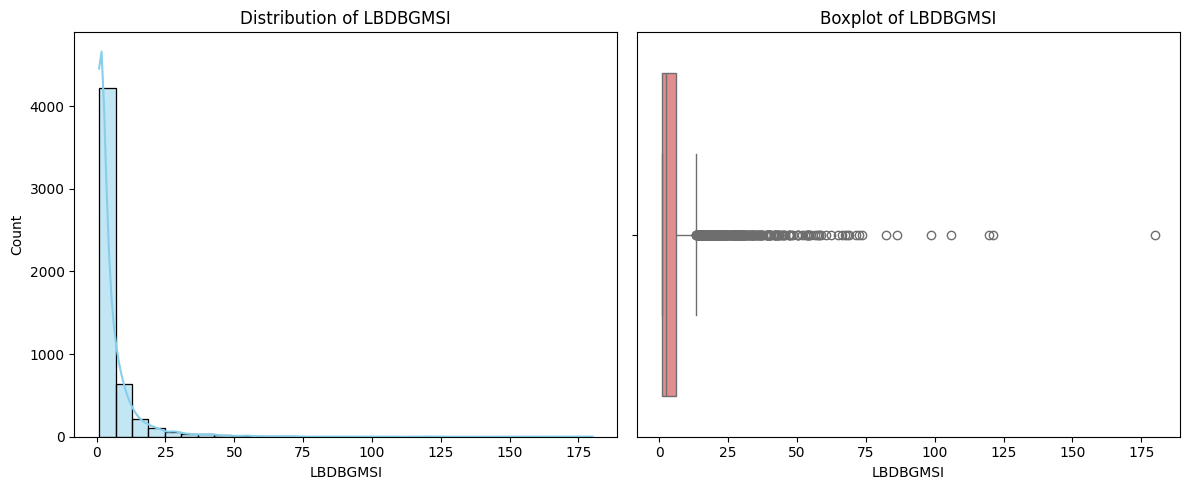

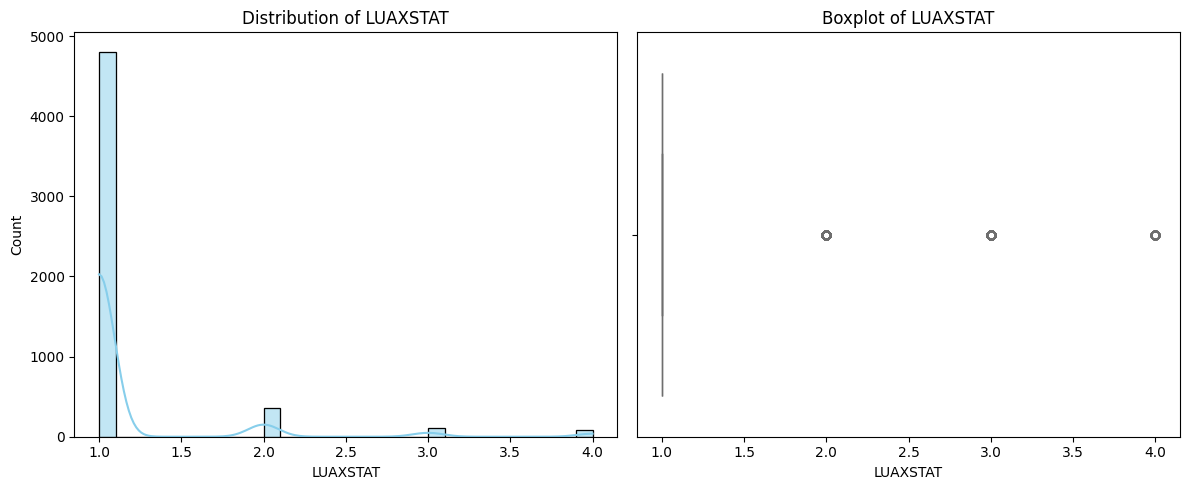

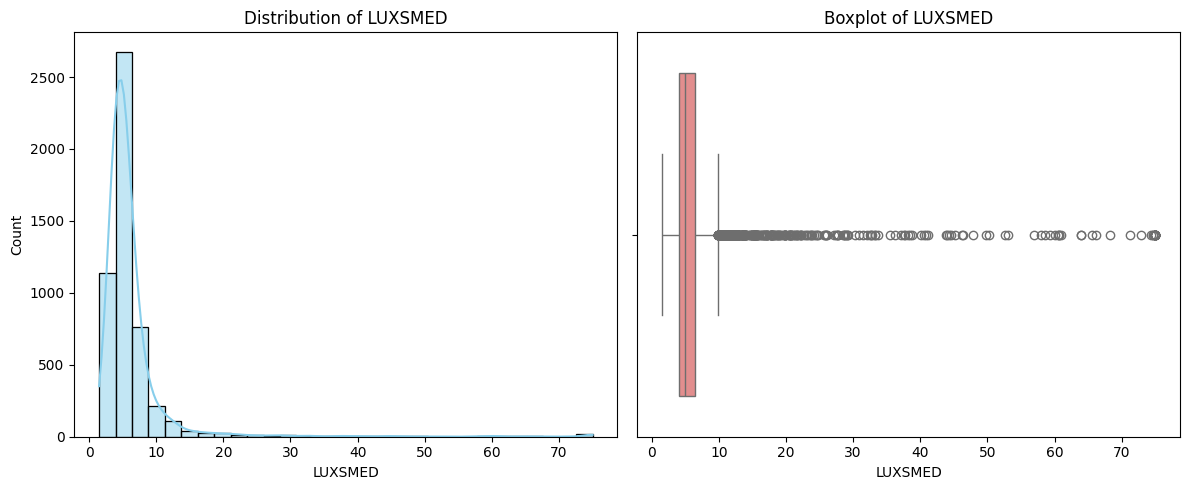

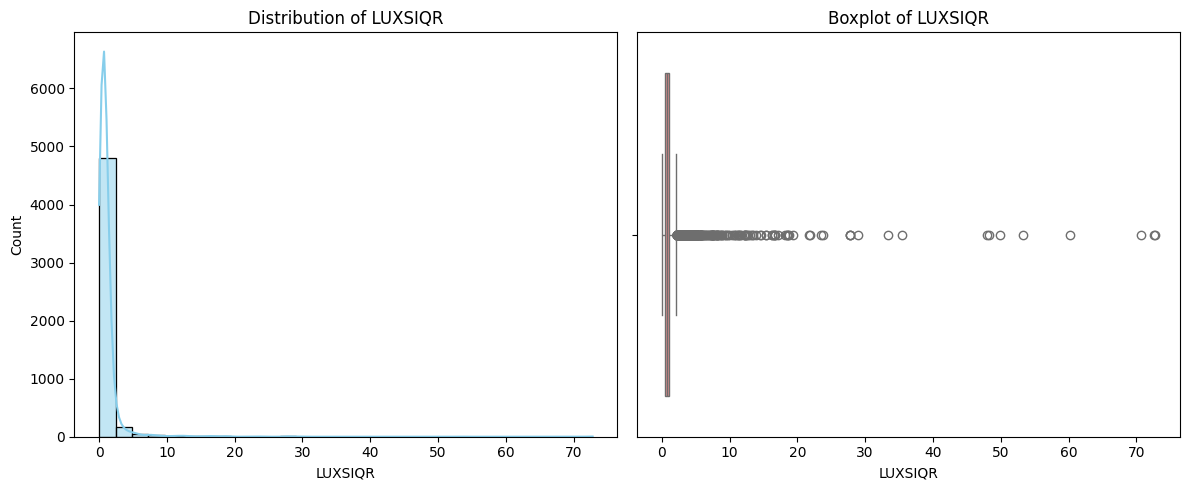

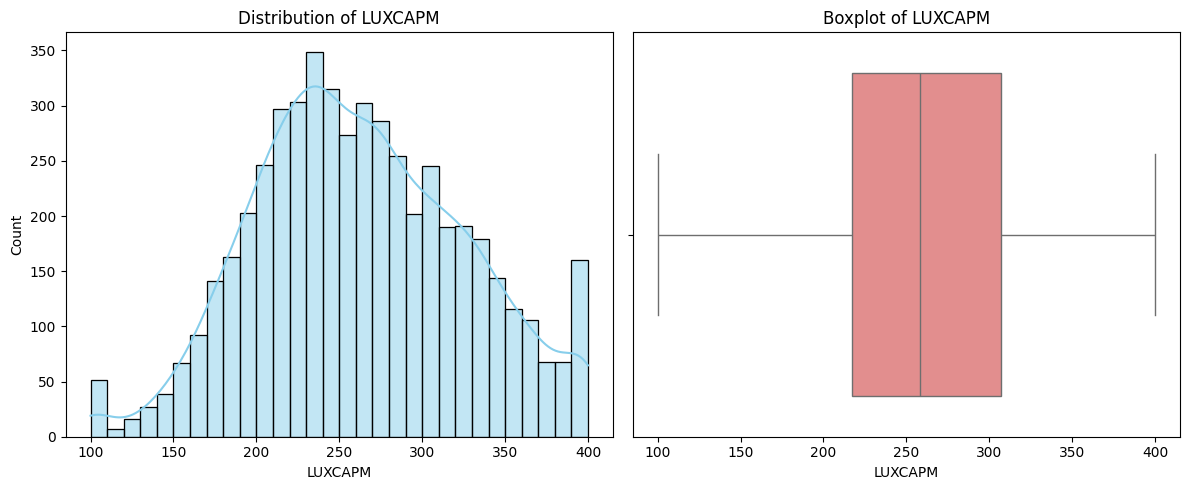

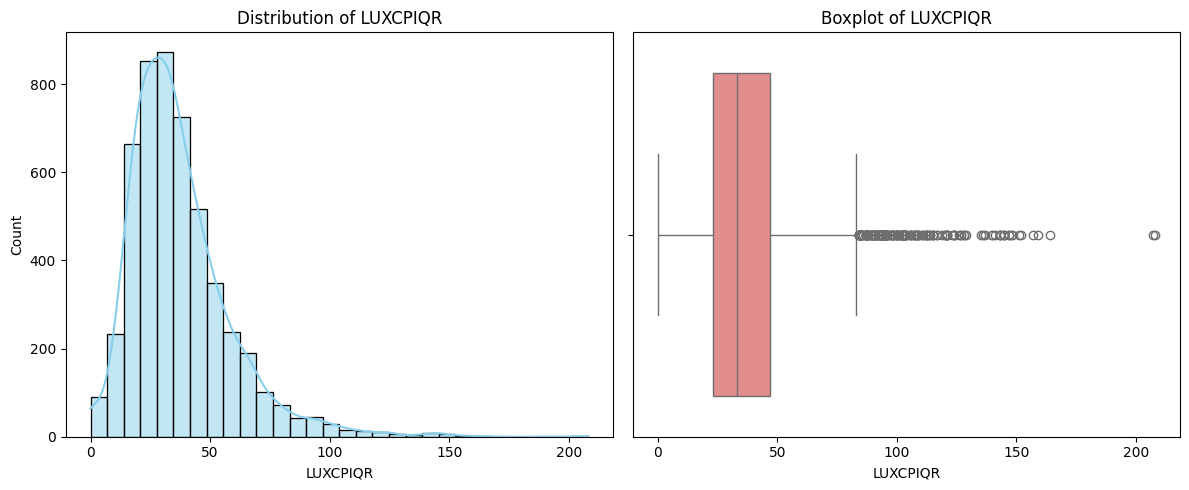

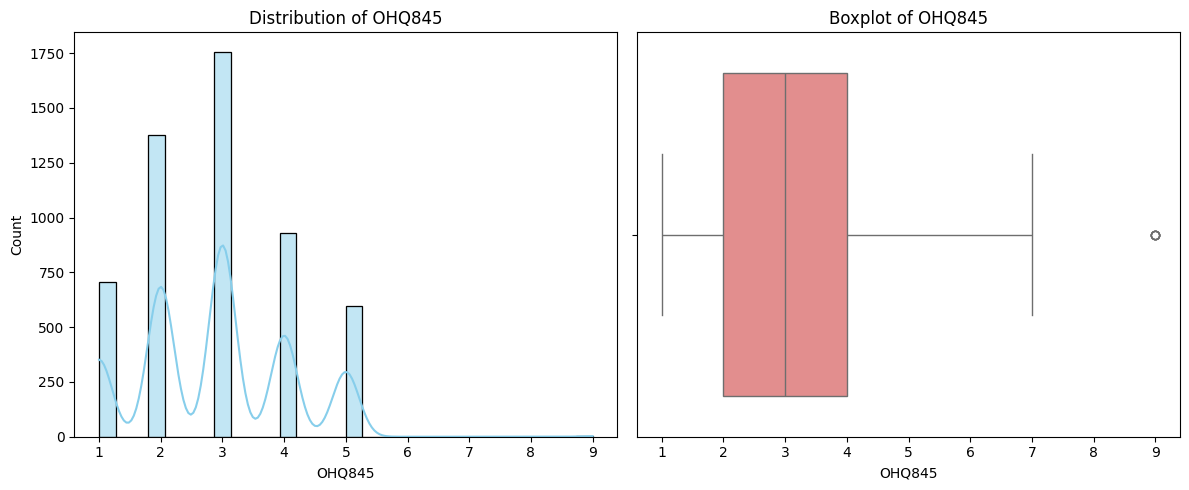

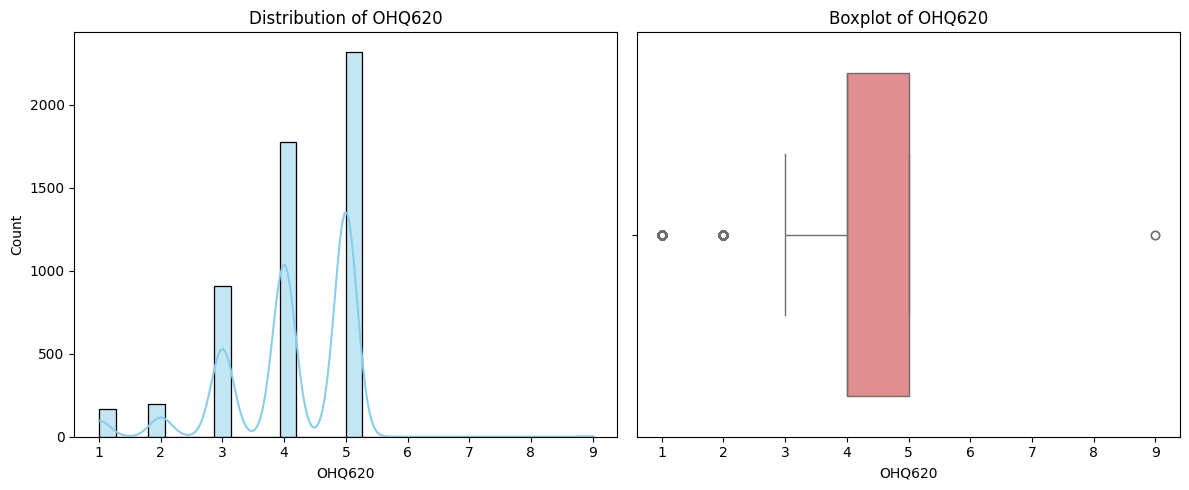

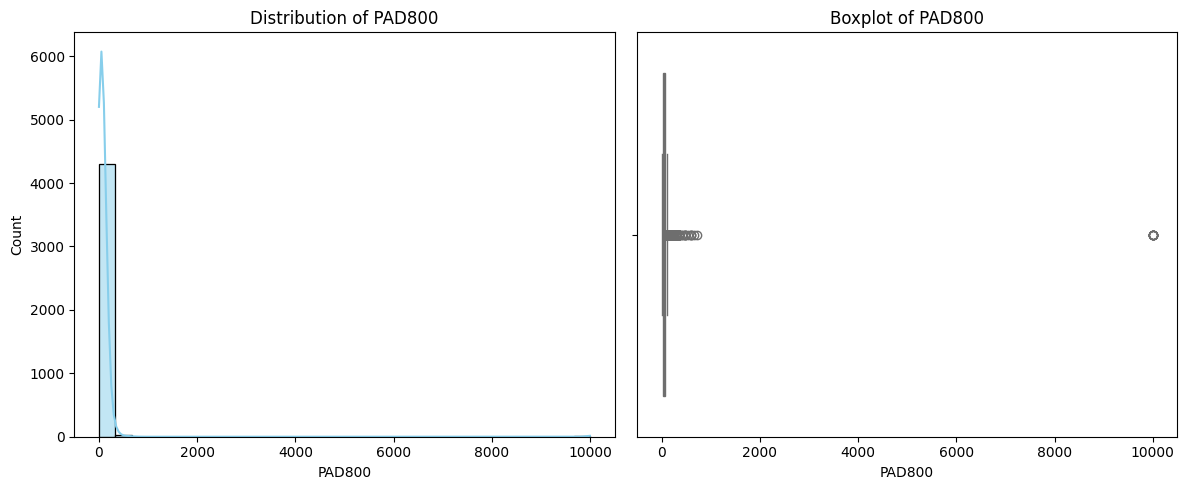

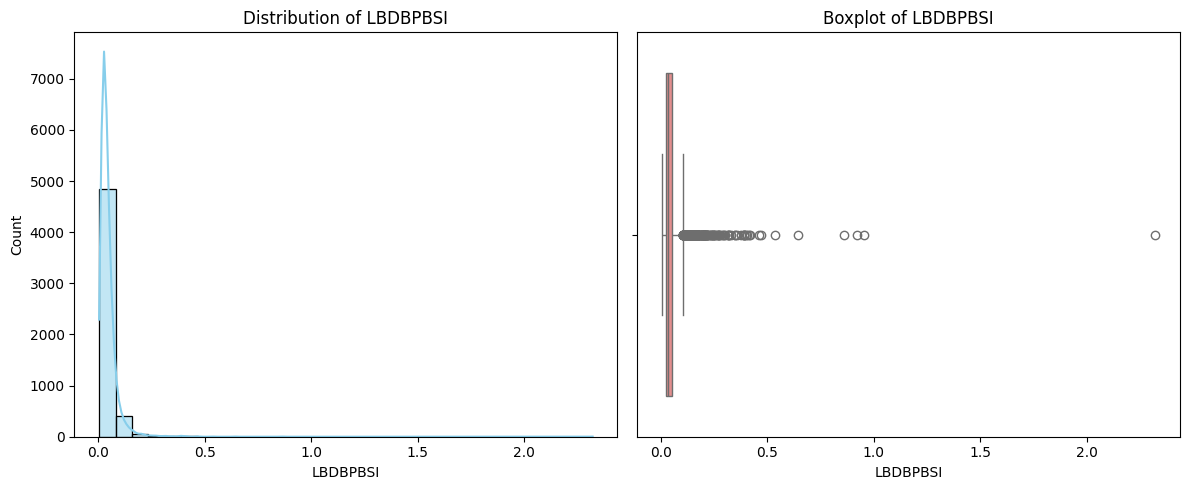

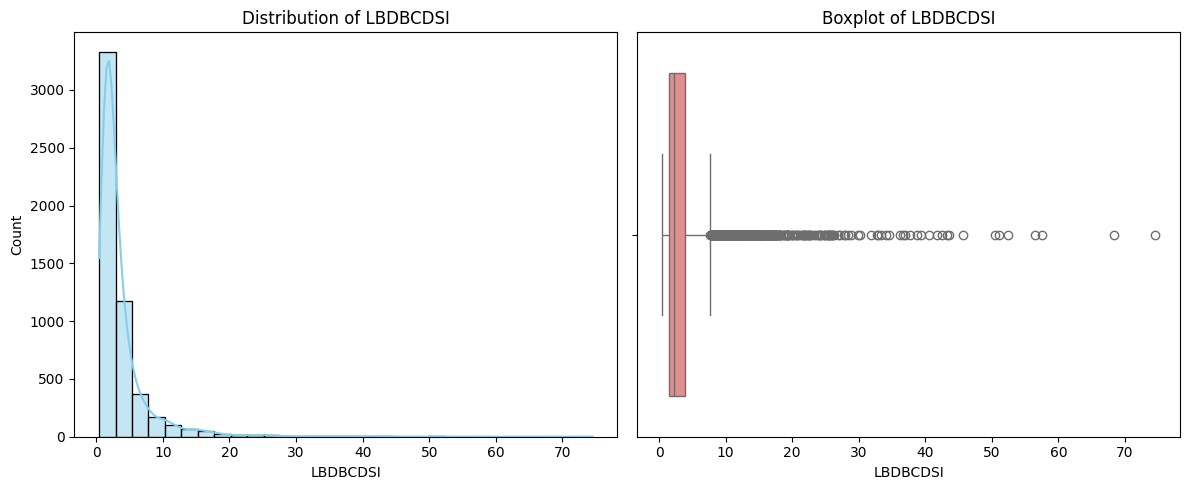

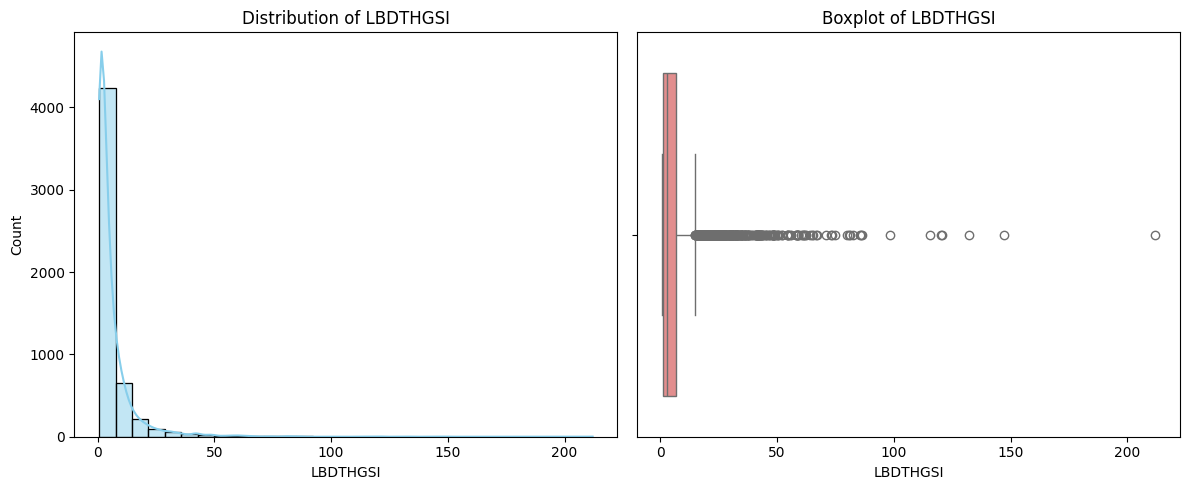

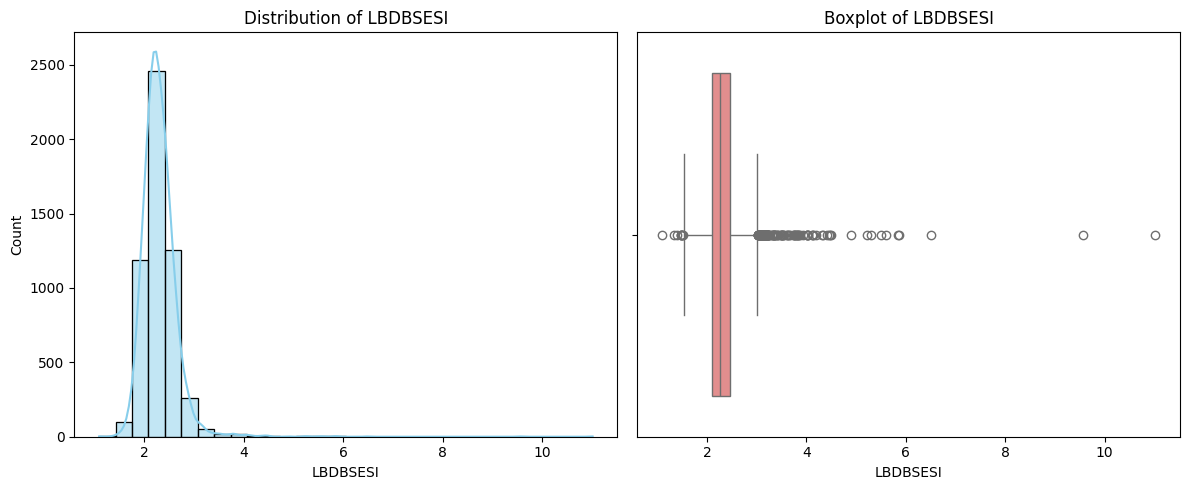

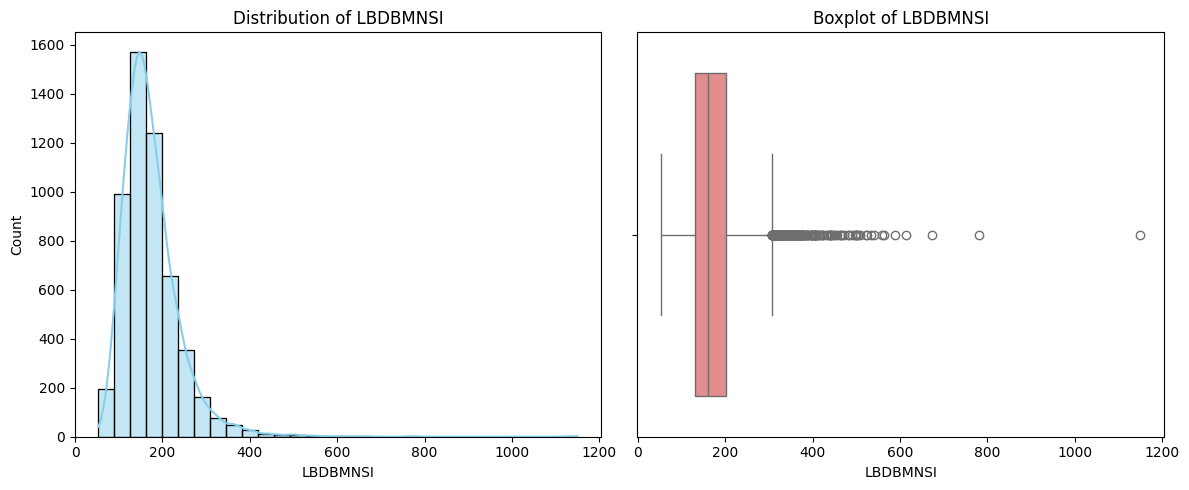

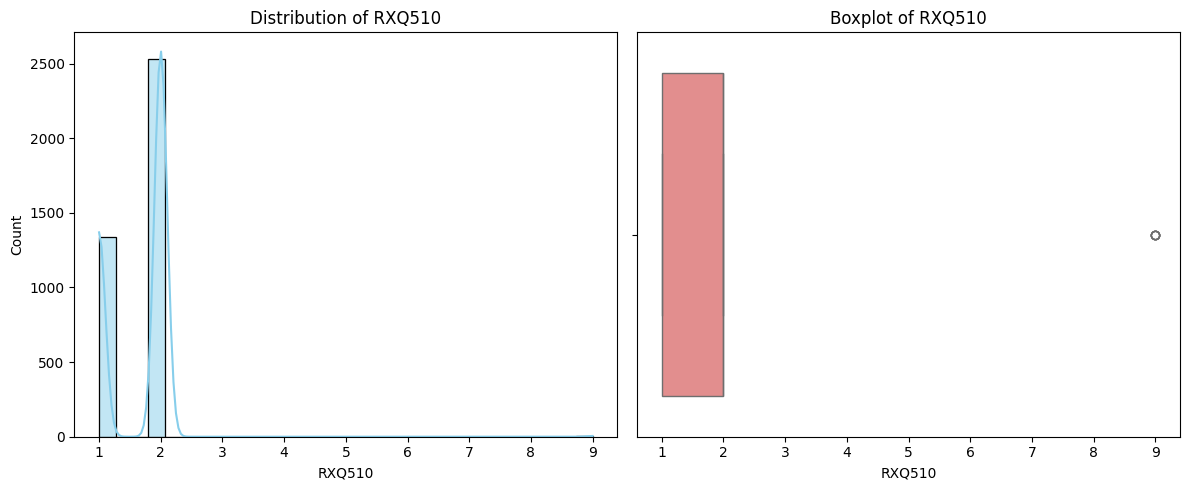

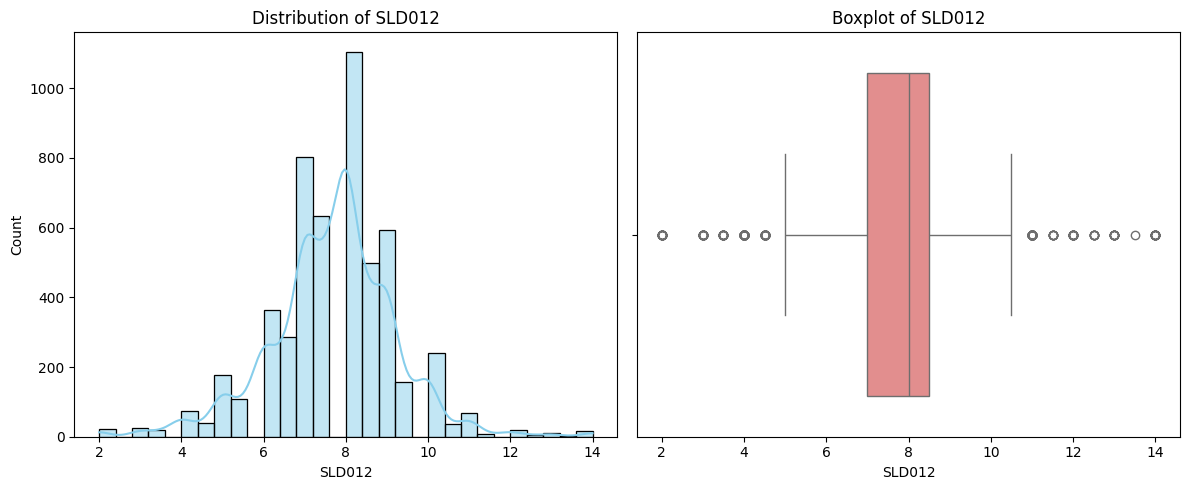

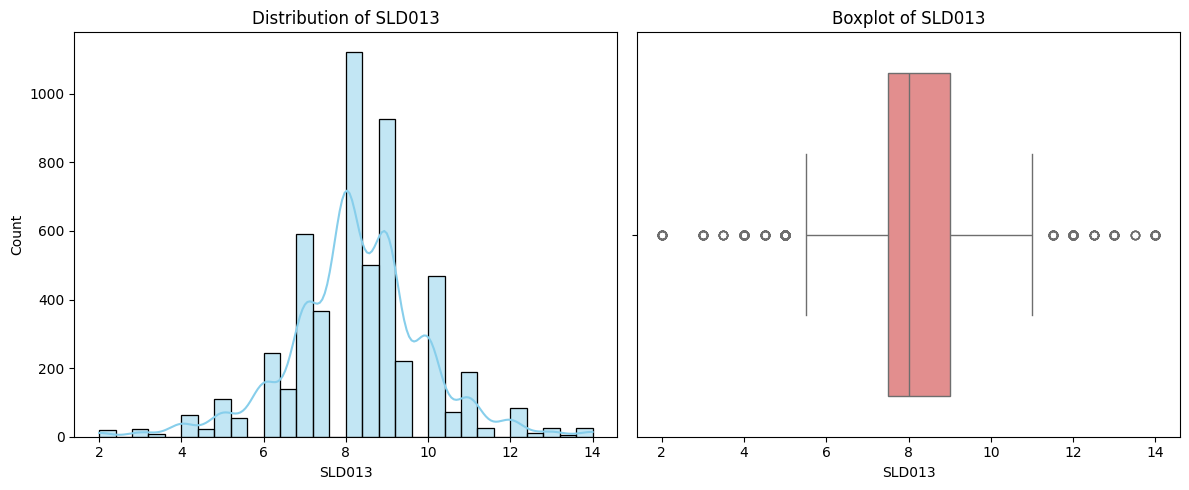

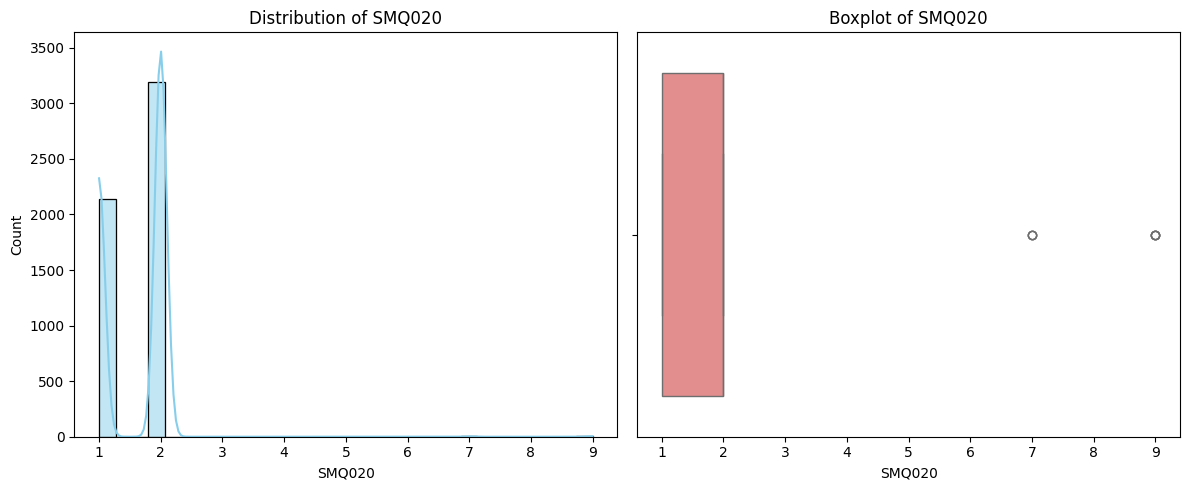

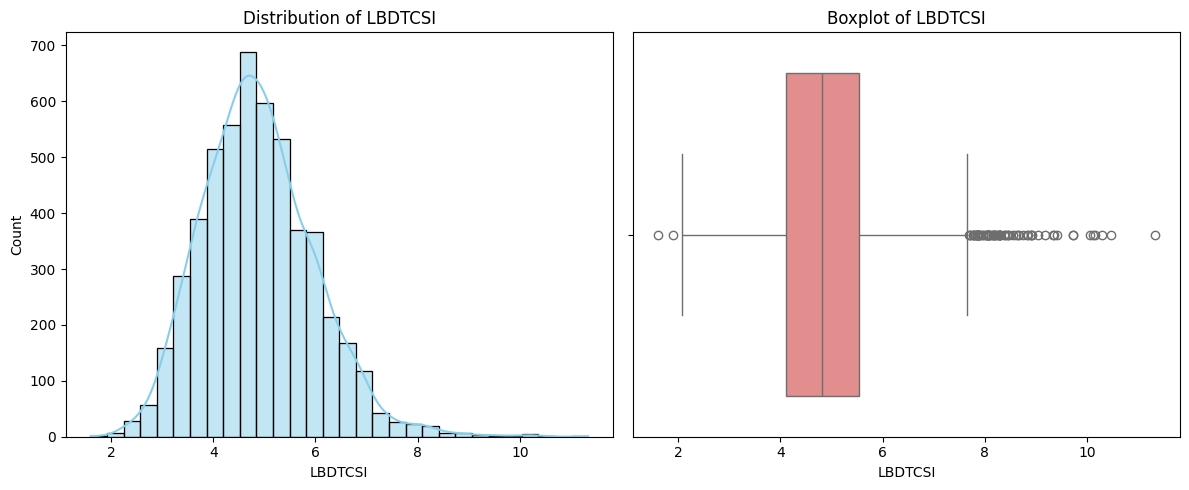

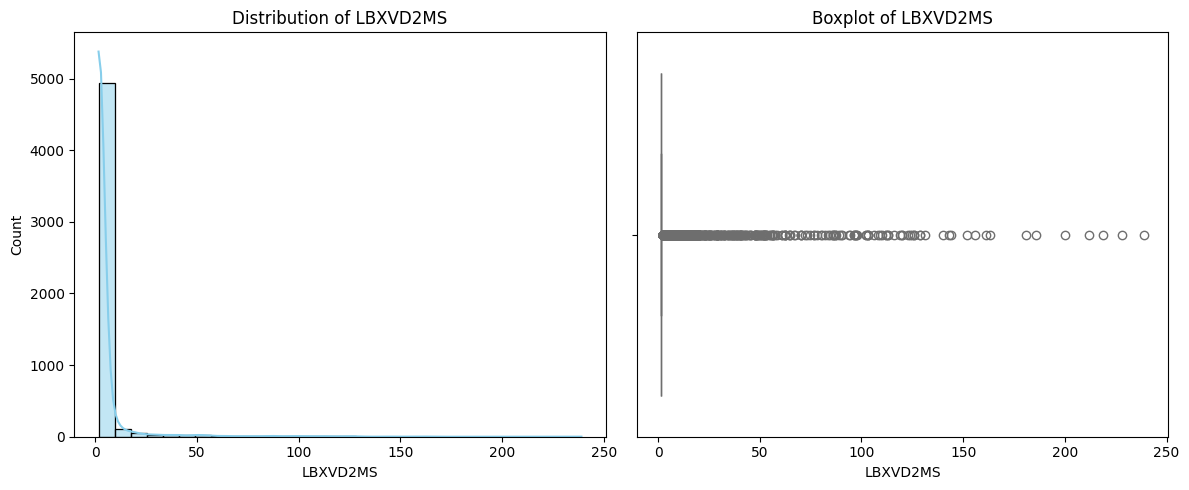

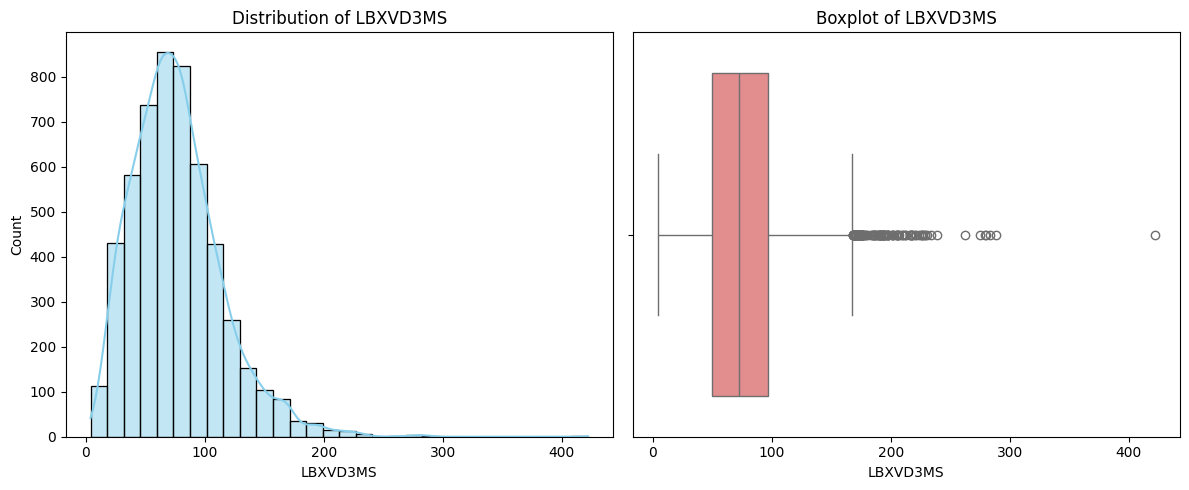

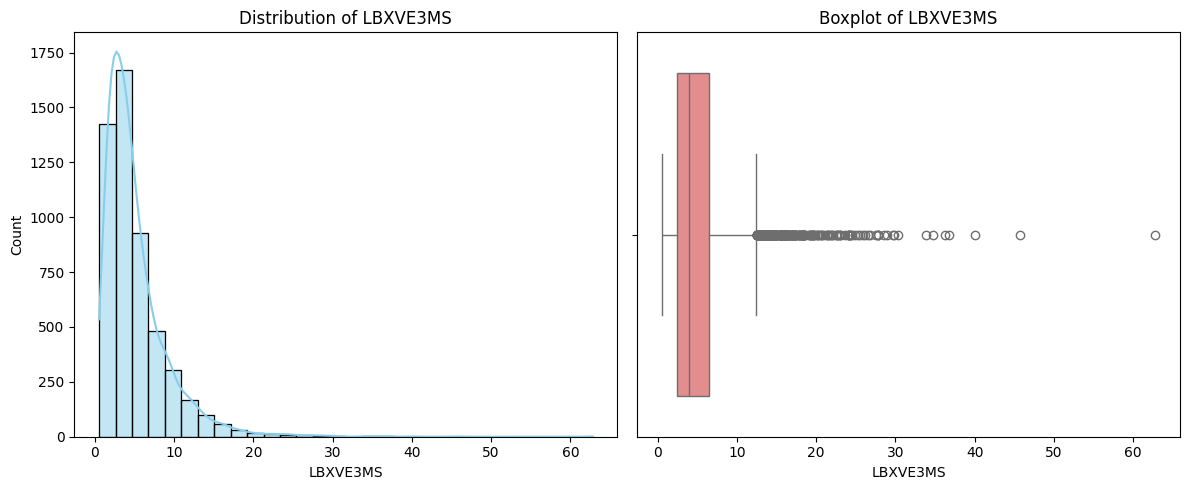

In [40]:
# Load sample dataset (you can replace this with your own dataset)

# Select only numeric columns
numeric_cols = filtered_dff.select_dtypes(include='number').columns
# Plot distribution and boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Distribution plot (histogram + KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(filtered_dff[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=filtered_dff[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

## What is Imputation?

**Imputation** is the process of filling in **missing** or **NaN (Not a Number)** values in a dataset with estimated values. 

---

### Why Impute?

- **Avoid Losing Data**: Removing rows or columns with missing values can result in a significant loss of data, especially if the missingness is widespread.
- **Maintain Consistency**: Imputation helps preserve the structure and size of the dataset, which is important for analysis and modeling.
- **Improve Model Accuracy**: Machine learning models and statistical analyses often require complete data, and imputing missing values can help improve model performance.

---

### Common Imputation Strategies:

1. **Mean Imputation** (for numerical data):
   - Replace missing values with the **mean** (average) value of the column.
   - Best suited for symmetric datasets without many outliers.

2. **Median Imputation** (for numerical data):
   - Replace missing values with the **median** value of the column.
   - Preferred when the data contains outliers since the median is more robust to extreme values.

3. **Mode Imputation** (for categorical data):
   - Replace missing values with the **mode** (most frequent value) of the column.
   - This is common for categorical variables where the most frequent category is a reasonable estimate for missing data.

4. **Forward Fill / Backward Fill**:
   - **Forward Fill**: Propagate the previous value to fill the missing data.
   - **Backward Fill**: Propagate the next value to fill the missing data.
   - These methods are typically used in time-series data.


In [43]:
numerical_skewed_cols = []
numerical_symmetric_cols = []

for col in filtered_dff.columns:
    if filtered_dff[col].dtype == "object":
        filtered_dff[col] = filtered_dff[col].fillna(filtered_dff[col].mode()[0])  # Categorical: mode
    else:
        # Numerical:
        skewness = skew(filtered_dff[col].dropna())
        if abs(skewness) > 1:
            # Highly skewed → median
            filtered_dff[col] = filtered_dff[col].fillna(filtered_dff[col].median())
            numerical_skewed_cols.append(col)
        else:
            # Symmetric → mean
            filtered_dff[col] = filtered_dff[col].fillna(filtered_dff[col].mean())
            numerical_symmetric_cols.append(col)

print("numerical symmetric cols: ", numerical_symmetric_cols)
print("numerical skewed cols: ", numerical_skewed_cols)
# Save cleaned data
impute_data_path = os.path.join(current_working_dir, "DataSet/CSV/Impute_Missing_Data_after_Dropping.csv")

if not os.path.exists(impute_data_path):
    filtered_dff.to_csv(impute_data_path, index=False)

C:\Users\EngAbdalhameed\AppData\Local\Temp\ipykernel_29880\1577253255.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\EngAbdalhameed\AppData\Local\Temp\ipykernel_29880\1577253255.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\EngAbdalhameed\AppData\Local\Temp\ipykernel_29880\1577253255.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

numerical symmetric cols:  ['SEQN', 'BAQ321C', 'BMXHT', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'BPXOSY2', 'BPXODI2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3', 'LBXRBCSI', 'LBXHGB', 'LBXMCVSI', 'LBXPLTSI', 'LBXMPSI', 'RIAGENDR', 'RIDAGEYR', 'DIQ010', 'LUXCAPM', 'OHQ845', 'SLD012', 'SLD013', 'LBDTCSI']
numerical skewed cols:  ['ALQ121', 'ALQ151', 'BAQ321A', 'BAQ321B', 'BAQ321D', 'BAQ530', 'BAQ110', 'BAQ132', 'BAQ140', 'BMXWT', 'BMXBMI', 'BMXHIP', 'BPQ020', 'BPQ080', 'BPQ101D', 'LBXWBCSI', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBXRDW', 'RIDRETH3', 'DMDBORN4', 'DIQ160', 'WTDRD1', 'DSDCOUNT', 'DSDANCNT', 'LBDRFOSI', 'LBDFOTSI', 'LBXSF1SI', 'LBXSF2SI', 'LBXSF3SI', 'LBXSF4SI', 'LBXSF5SI', 'LBXSF6SI', 'LBXGH', 'LBDHDDSI', 'LBXHSCRP', 'HSQ590', 'LBDIHGSI', 'LBDBGESI', 'LBDBGMSI', 'LUAXSTAT', 'LUXSMED', 'LUXSIQR', 'LUXCPIQR', 'OHQ620', 'PAD800', 'LBDBPBSI', 'LBDBCDSI', 'LBDTHGSI', 'LBDBSESI', 'LBDBMNSI', 'RXQ510', 'SMQ020', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3M

In [45]:
# check imputation worked correctly
# sum for each column for null values should result in 0
filtered_dff.isnull().sum()

SEQN        0
ALQ121      0
ALQ151      0
BAQ321A     0
BAQ321B     0
BAQ321C     0
BAQ321D     0
BAQ530      0
BAQ110      0
BAQ132      0
BAQ140      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
BMXHIP      0
BPQ020      0
BPQ080      0
BPQ101D     0
BPXOSY1     0
BPXODI1     0
BPXOSY2     0
BPXODI2     0
BPXOSY3     0
BPXODI3     0
BPXOPLS1    0
BPXOPLS2    0
BPXOPLS3    0
LBXWBCSI    0
LBDLYMNO    0
LBDMONO     0
LBDNENO     0
LBXRBCSI    0
LBXHGB      0
LBXMCVSI    0
LBXRDW      0
LBXPLTSI    0
LBXMPSI     0
RIAGENDR    0
RIDAGEYR    0
RIDRETH3    0
DMDBORN4    0
DIQ010      0
DIQ160      0
WTDRD1      0
DSDCOUNT    0
DSDANCNT    0
LBDRFOSI    0
LBDFOTSI    0
LBXSF1SI    0
LBXSF2SI    0
LBXSF3SI    0
LBXSF4SI    0
LBXSF5SI    0
LBXSF6SI    0
LBXGH       0
LBDHDDSI    0
LBXHSCRP    0
HSQ590      0
LBDIHGSI    0
LBDBGESI    0
LBDBGMSI    0
LUAXSTAT    0
LUXSMED     0
LUXSIQR     0
LUXCAPM     0
LUXCPIQR    0
OHQ845      0
OHQ620

In [46]:
filtered_dff.dtypes

SEQN        float64
ALQ121      float64
ALQ151      float64
BAQ321A     float64
BAQ321B     float64
BAQ321C     float64
BAQ321D     float64
BAQ530      float64
BAQ110      float64
BAQ132      float64
BAQ140      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
BMXHIP      float64
BPQ020      float64
BPQ080      float64
BPQ101D     float64
BPXOSY1     float64
BPXODI1     float64
BPXOSY2     float64
BPXODI2     float64
BPXOSY3     float64
BPXODI3     float64
BPXOPLS1    float64
BPXOPLS2    float64
BPXOPLS3    float64
LBXWBCSI    float64
LBDLYMNO    float64
LBDMONO     float64
LBDNENO     float64
LBXRBCSI    float64
LBXHGB      float64
LBXMCVSI    float64
LBXRDW      float64
LBXPLTSI    float64
LBXMPSI     float64
RIAGENDR    float64
RIDAGEYR    float64
RIDRETH3    float64
DMDBORN4    float64
DIQ010      float64
DIQ160      float64
WTDRD1      float64
DSDCOUNT    float64
DSDANCNT    float64


In [47]:
print(filtered_dff['DIQ010'].value_counts().sort_values(ascending=False))

print('''\nVariable Name: DIQ010
Target: "Doctor told you have diabetes?"
  Values:
  1 = Yes
  2 = No
  3 = Borderline
  7 = Refused
  9 = Don’t know''')

DIQ010
2.0    4483
1.0     705
3.0     181
Name: count, dtype: int64

Variable Name: DIQ010
Target: "Doctor told you have diabetes?"
  Values:
  1 = Yes
  2 = No
  3 = Borderline
  7 = Refused
  9 = Don’t know


In [48]:
# 2 datasets
D = filtered_dff[(filtered_dff['DIQ010'] == 1)]
H = filtered_dff[(filtered_dff['DIQ010'] == 2)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = filtered_dff['DIQ010'].value_counts().values.tolist(),
                    y = ['healthy','diabetic' ],
                    orientation = 'h',
                    text=filtered_dff['DIQ010'].value_counts().values.tolist(),
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = filtered_dff['DIQ010'].value_counts(),
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'],
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [49]:
target_count()
target_percent()

In [51]:
### Correlation
def correlation_plot(df):
    #correlation
    numeric_df=df.select_dtypes(include='number')
    correlation = numeric_df.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            autosize = False,
                            height  = 5000,
                            width   = 6000,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [52]:
correlation_plot(filtered_dff)